## __Importing Libraries__

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For upsampling
from sklearn.utils import resample

# For encoding
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

## __Importing Dataset__

In [2]:
df = pd.read_csv('ExperimentalMigraneData.csv')


x = df[['Age','Duration','Frequency','Location','Character','Intensity','Nausea','Vomit','Phonophobia','Photophobia','Visual','Sensory','Dysphasia','Dysarthria','Vertigo','Tinnitus','Hypoacusis','Diplopia','Visual_defect','Ataxia','Conscience','Paresthesia','DPF', 'On Periods']].values  #selección de variables de entrada
y = df['Types']  #select target

In [3]:
df.head()


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF,On Periods,Type,Types
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,Non-Menstrual Migraine,0
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,1,Non-Menstrual Migraine,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,Non-Menstrual Migraine,0
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,Non-Menstrual Migraine,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,1,0,Non-Menstrual Migraine,0


## ___Exploratory Data Analysis___

## __Relation between Categorical Variable and Target Variable__

In [4]:
cat_col = []
con_col = []

for col in df.columns:
    if df[col].nunique() < 15:
        cat_col.append(col)
    else:
        con_col.append(col)

In [5]:
def count_percentage_plot(df, x, target, suptitle):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    plt.suptitle(suptitle, fontsize=16)
    
    # Plot the count plot
    ax1.set_title(f"Number of {x.capitalize()} across Migraine Type")
    sns.countplot(data=df,x=target, hue=x, ax=ax1, palette="Set1")
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    # Plot the percent plot
    ax2.set_title(f"Percentage of {x.capitalize()} across Migraine Type")
    sns.histplot(df, x=target, hue=x, stat="probability", multiple="fill", shrink=1,ax=ax2, palette='Set1')
    ax2.set_xlabel("")
    ax2.set_ylabel("Percentage")
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    
    # Annotating the plots
    for p1,p2 in zip(ax1.patches,ax2.patches):
        ax1.annotate("{:.1f}".format(p1.get_height()), (p1.get_x(),p1.get_height()))
        ax2.annotate("{:.2f}".format(p2.get_height()), (p2.get_x(),p2.get_height()))
        
    plt.tight_layout(pad=2)
    plt.show()

## __Duration and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


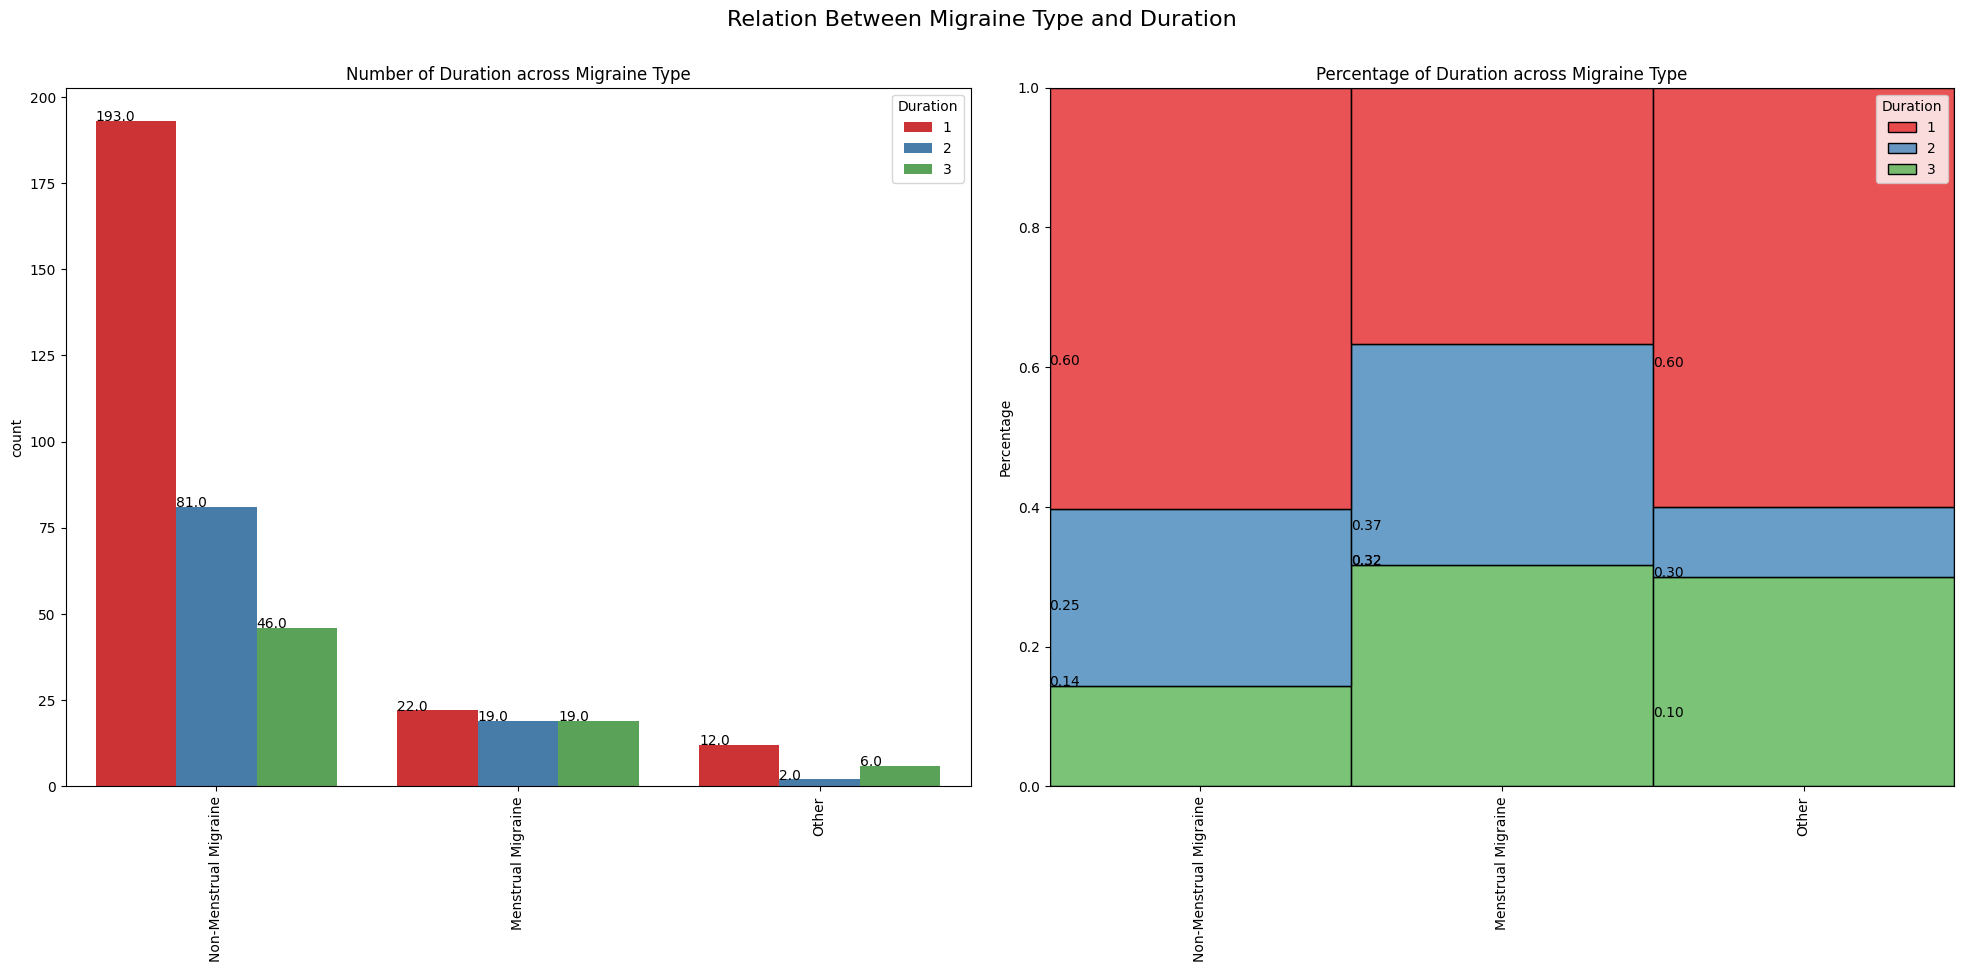

In [6]:
count_percentage_plot(df, 'Duration', 'Type', "Relation Between Migraine Type and Duration")

## __Frequency and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


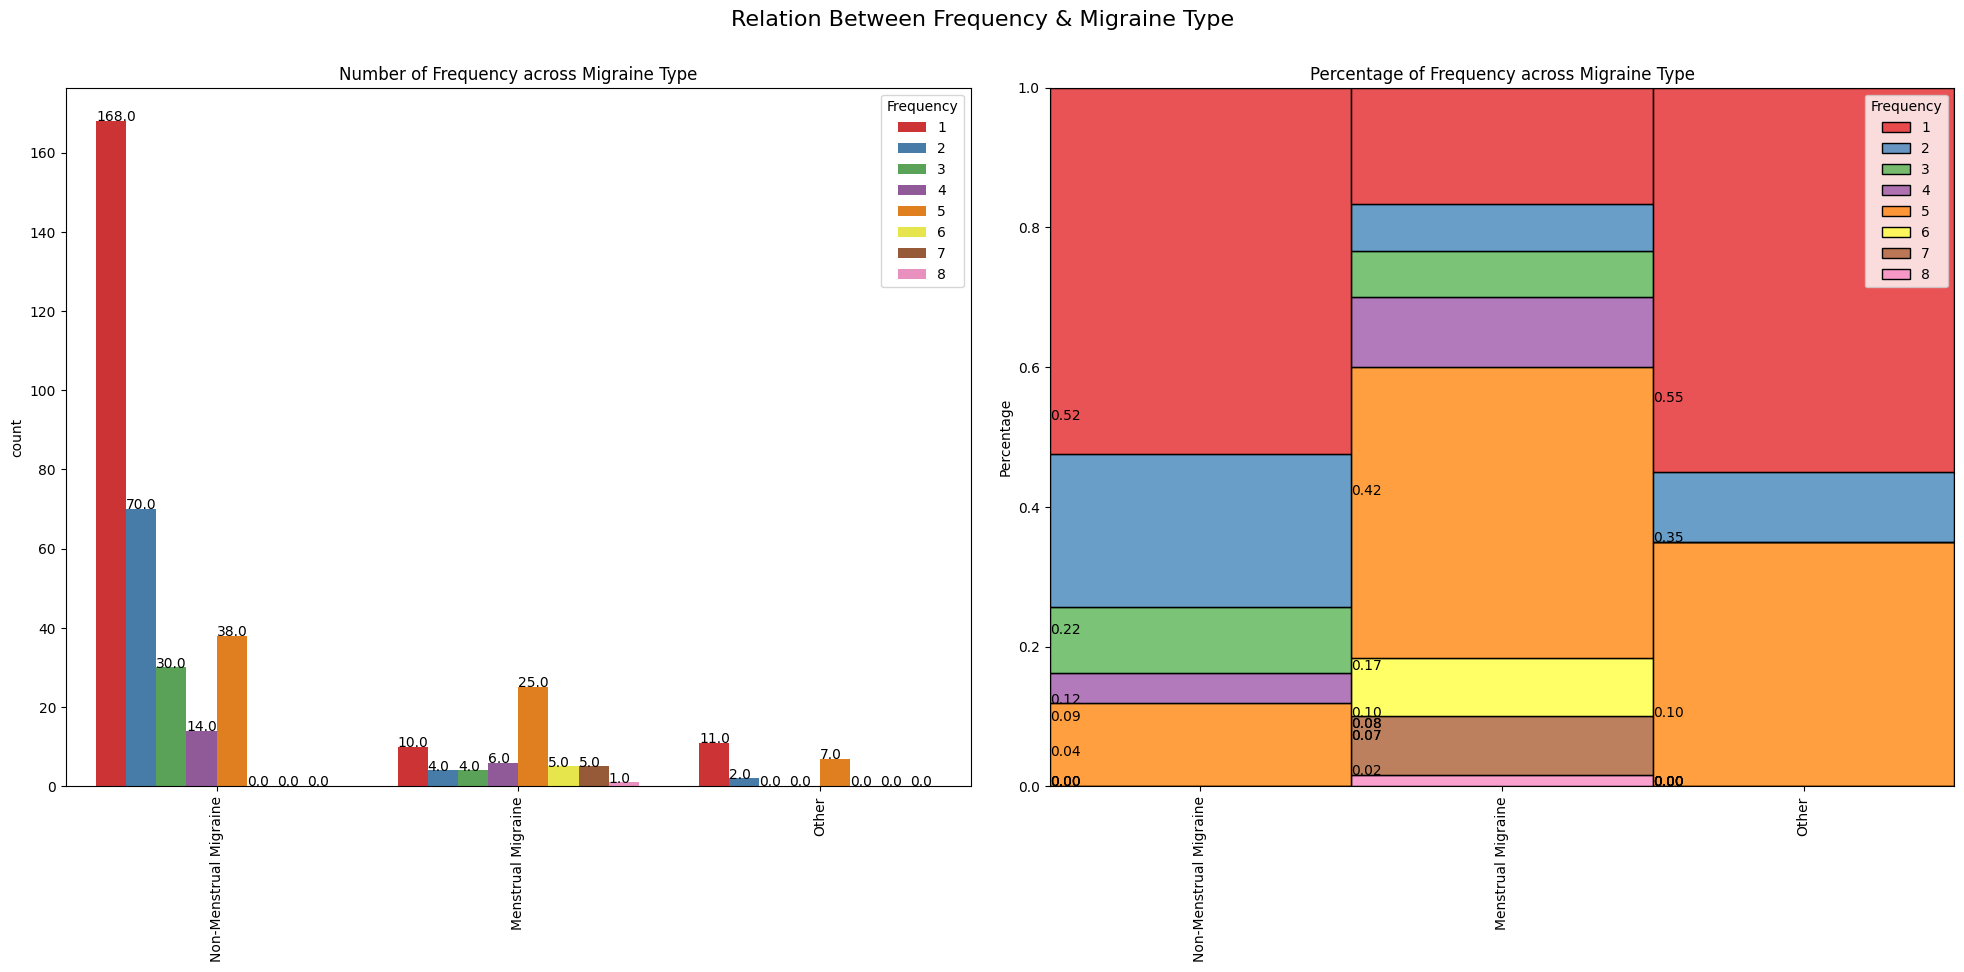

In [7]:
count_percentage_plot(df, 'Frequency', 'Type', "Relation Between Frequency & Migraine Type")

## __Location and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


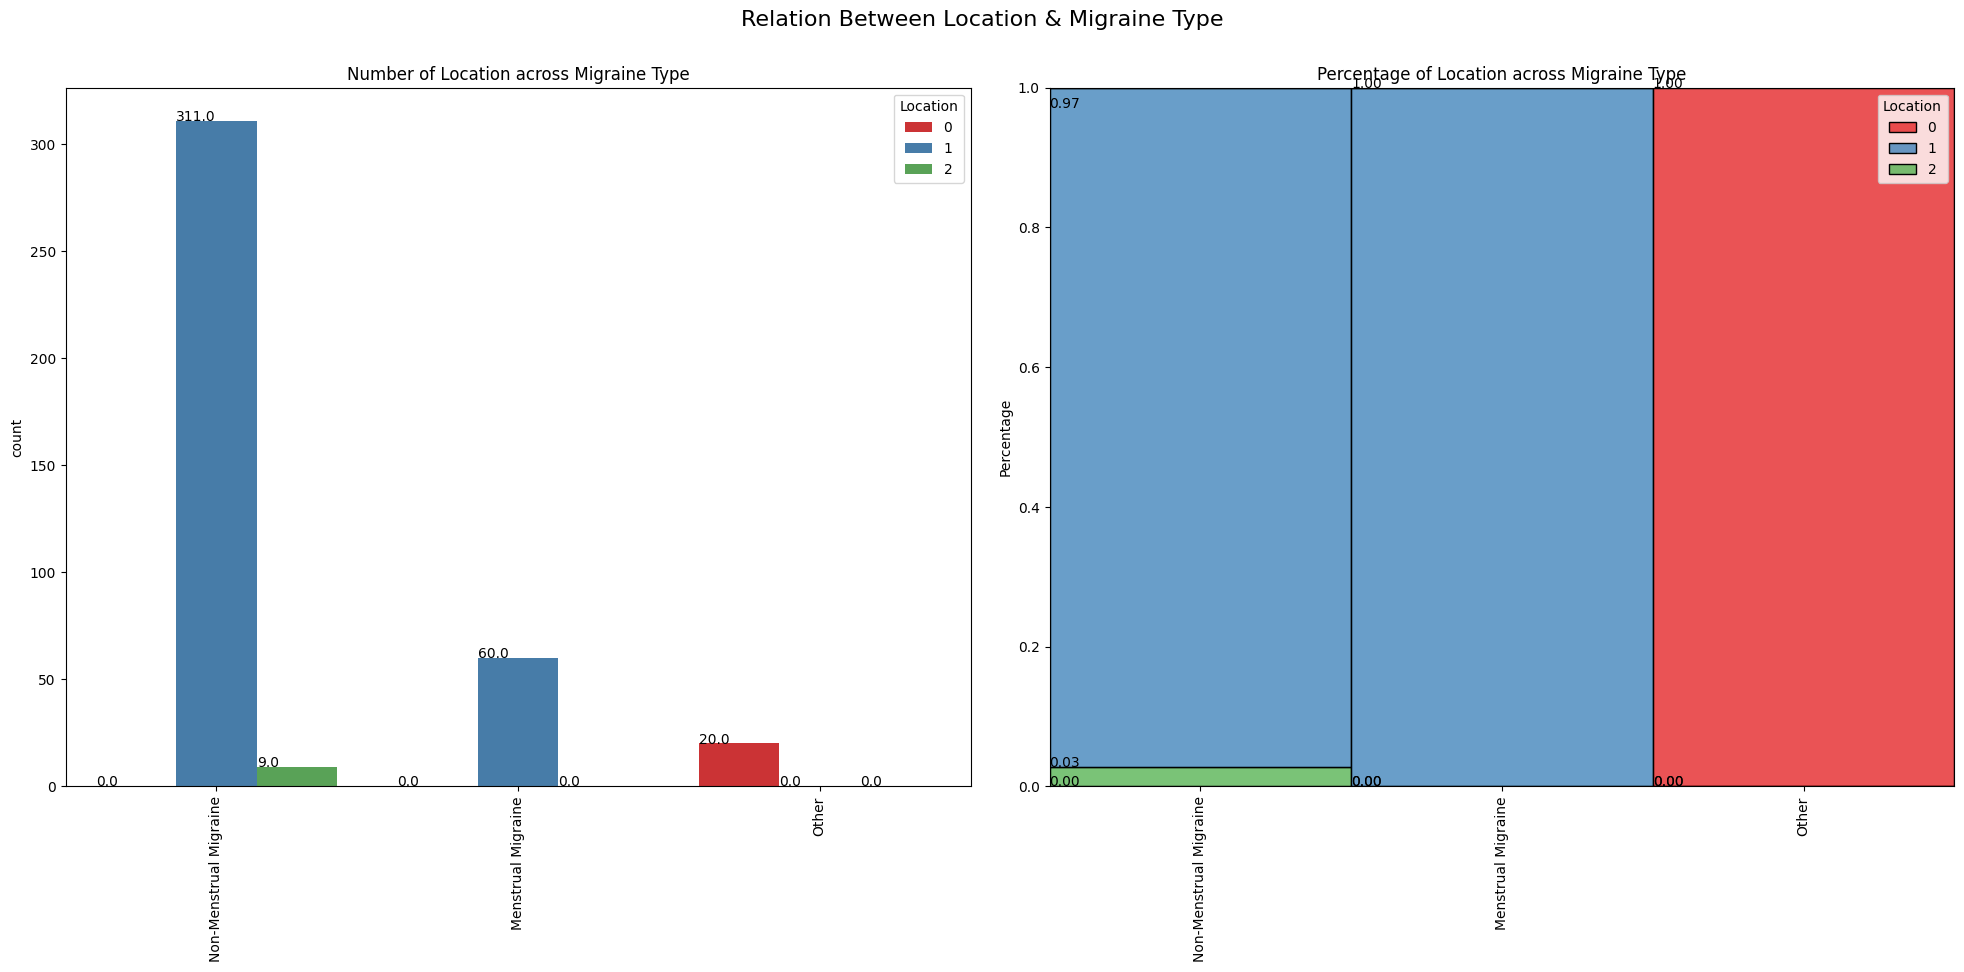

In [8]:
count_percentage_plot(df, 'Location', 'Type', "Relation Between Location & Migraine Type")

## __Character and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


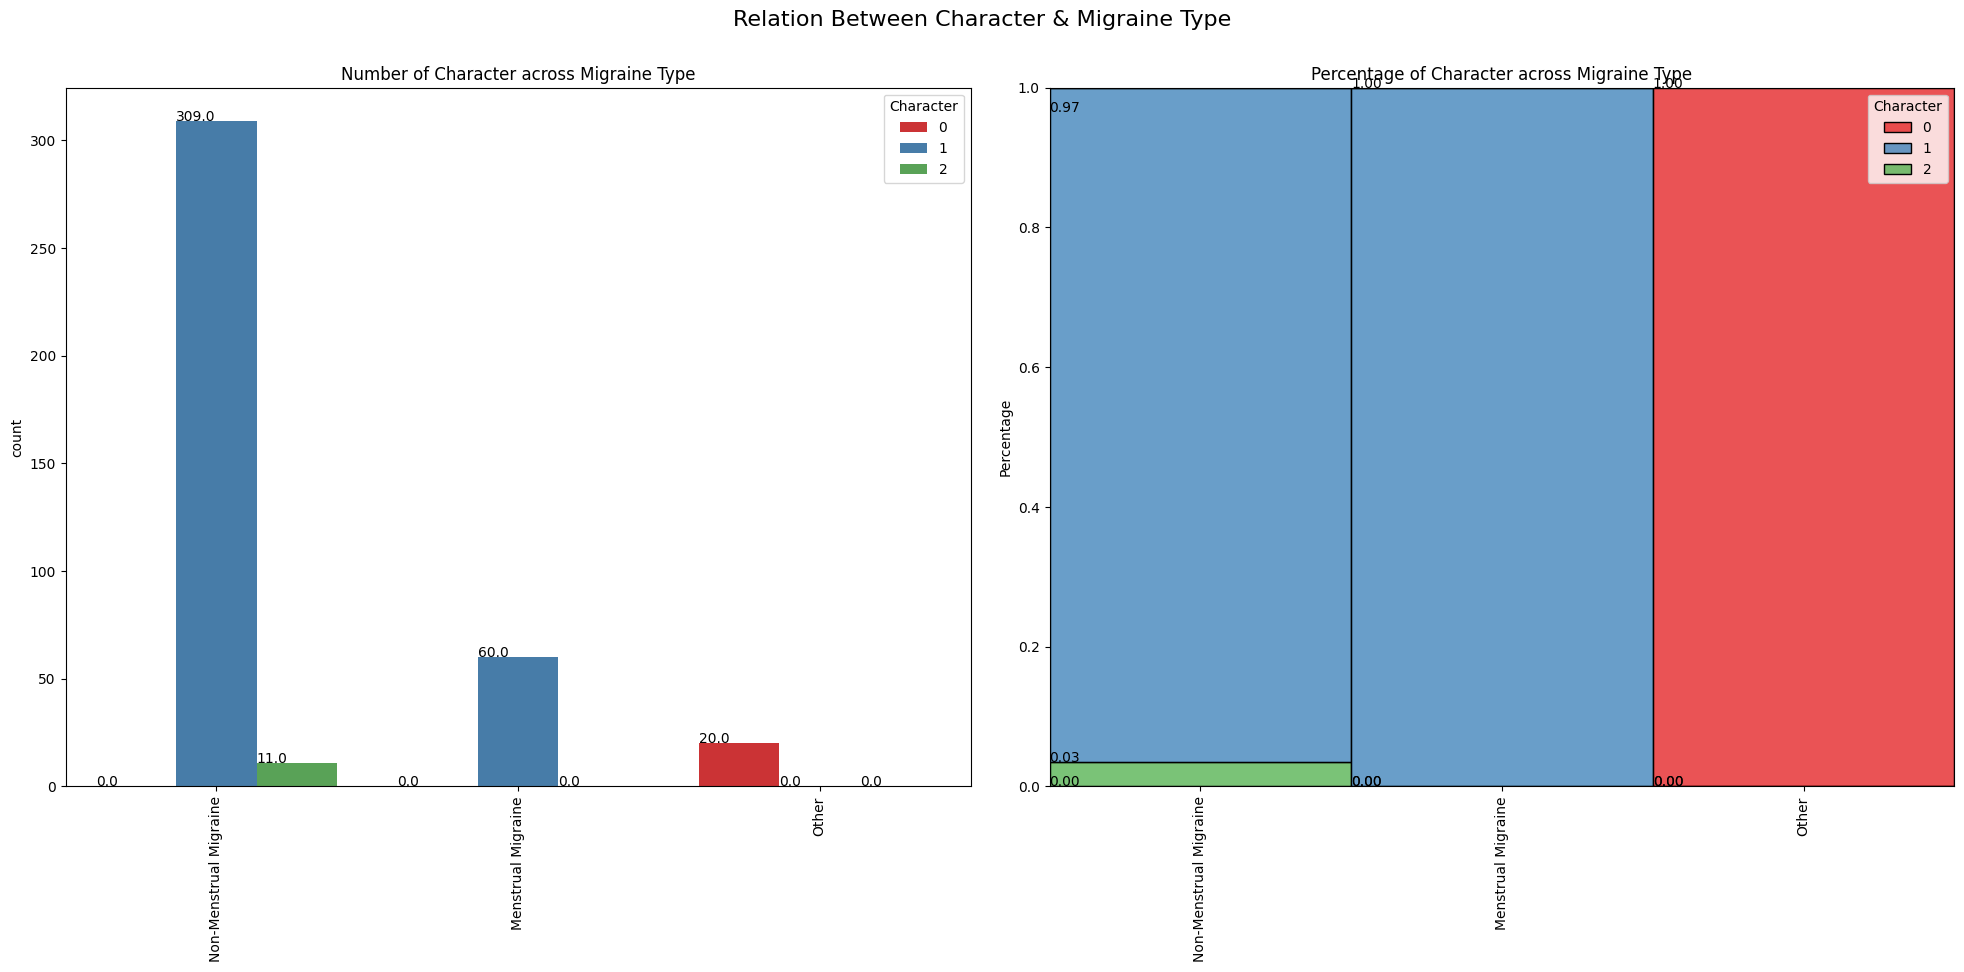

In [9]:
count_percentage_plot(df, 'Character', 'Type', "Relation Between Character & Migraine Type")

## __Intensity and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


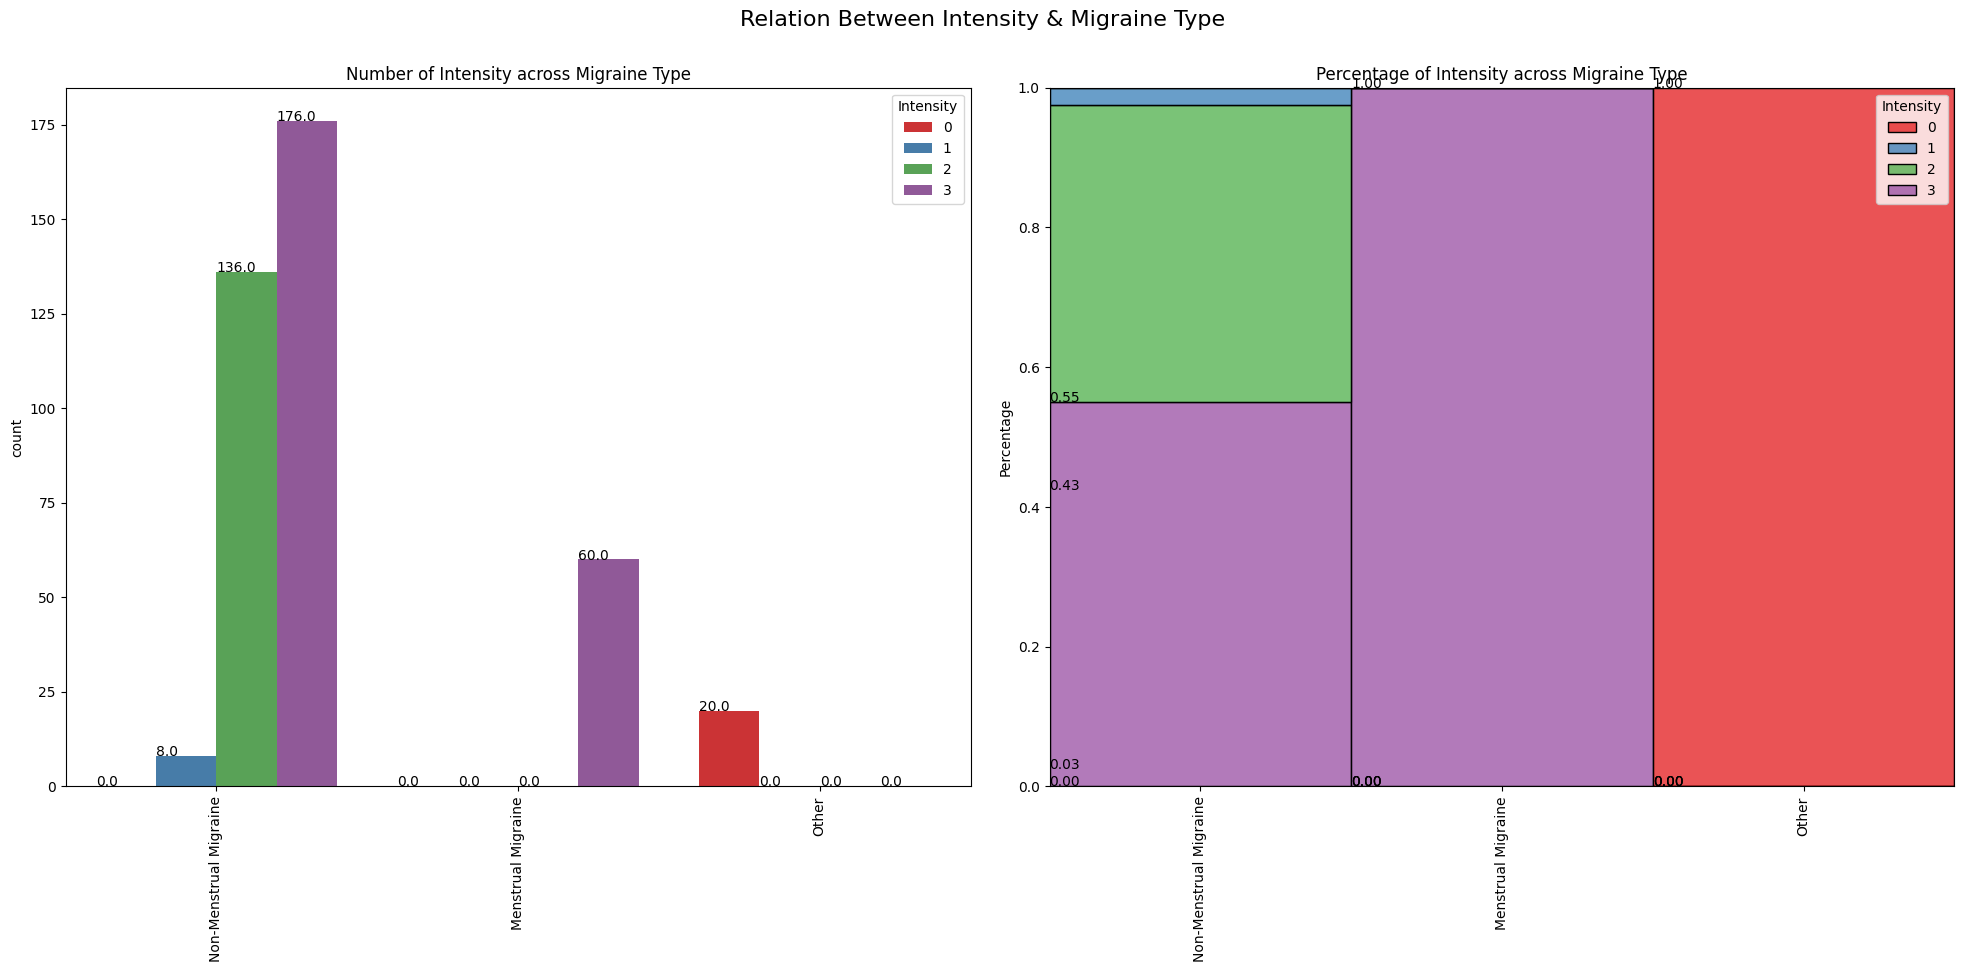

In [10]:
count_percentage_plot(df, 'Intensity', 'Type', "Relation Between Intensity & Migraine Type")

## __Nausea and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


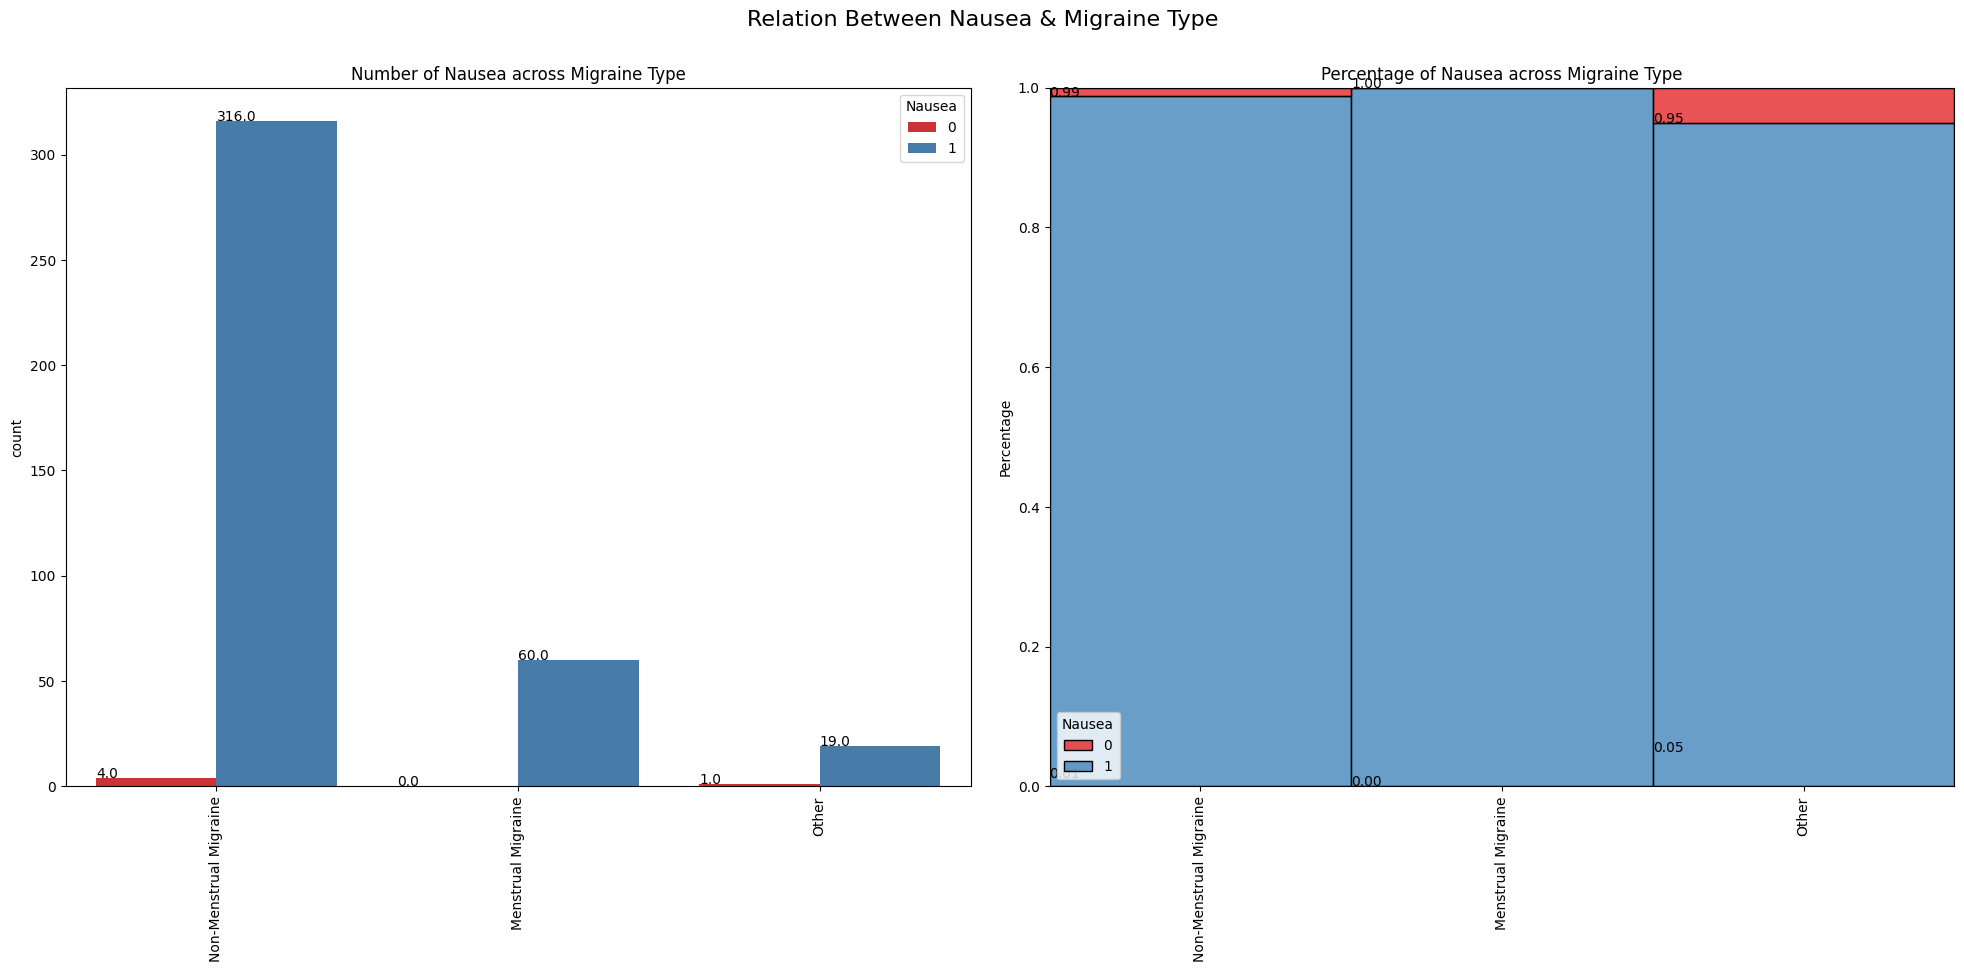

In [11]:
count_percentage_plot(df, 'Nausea', 'Type', "Relation Between Nausea & Migraine Type")

## __Vomit and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


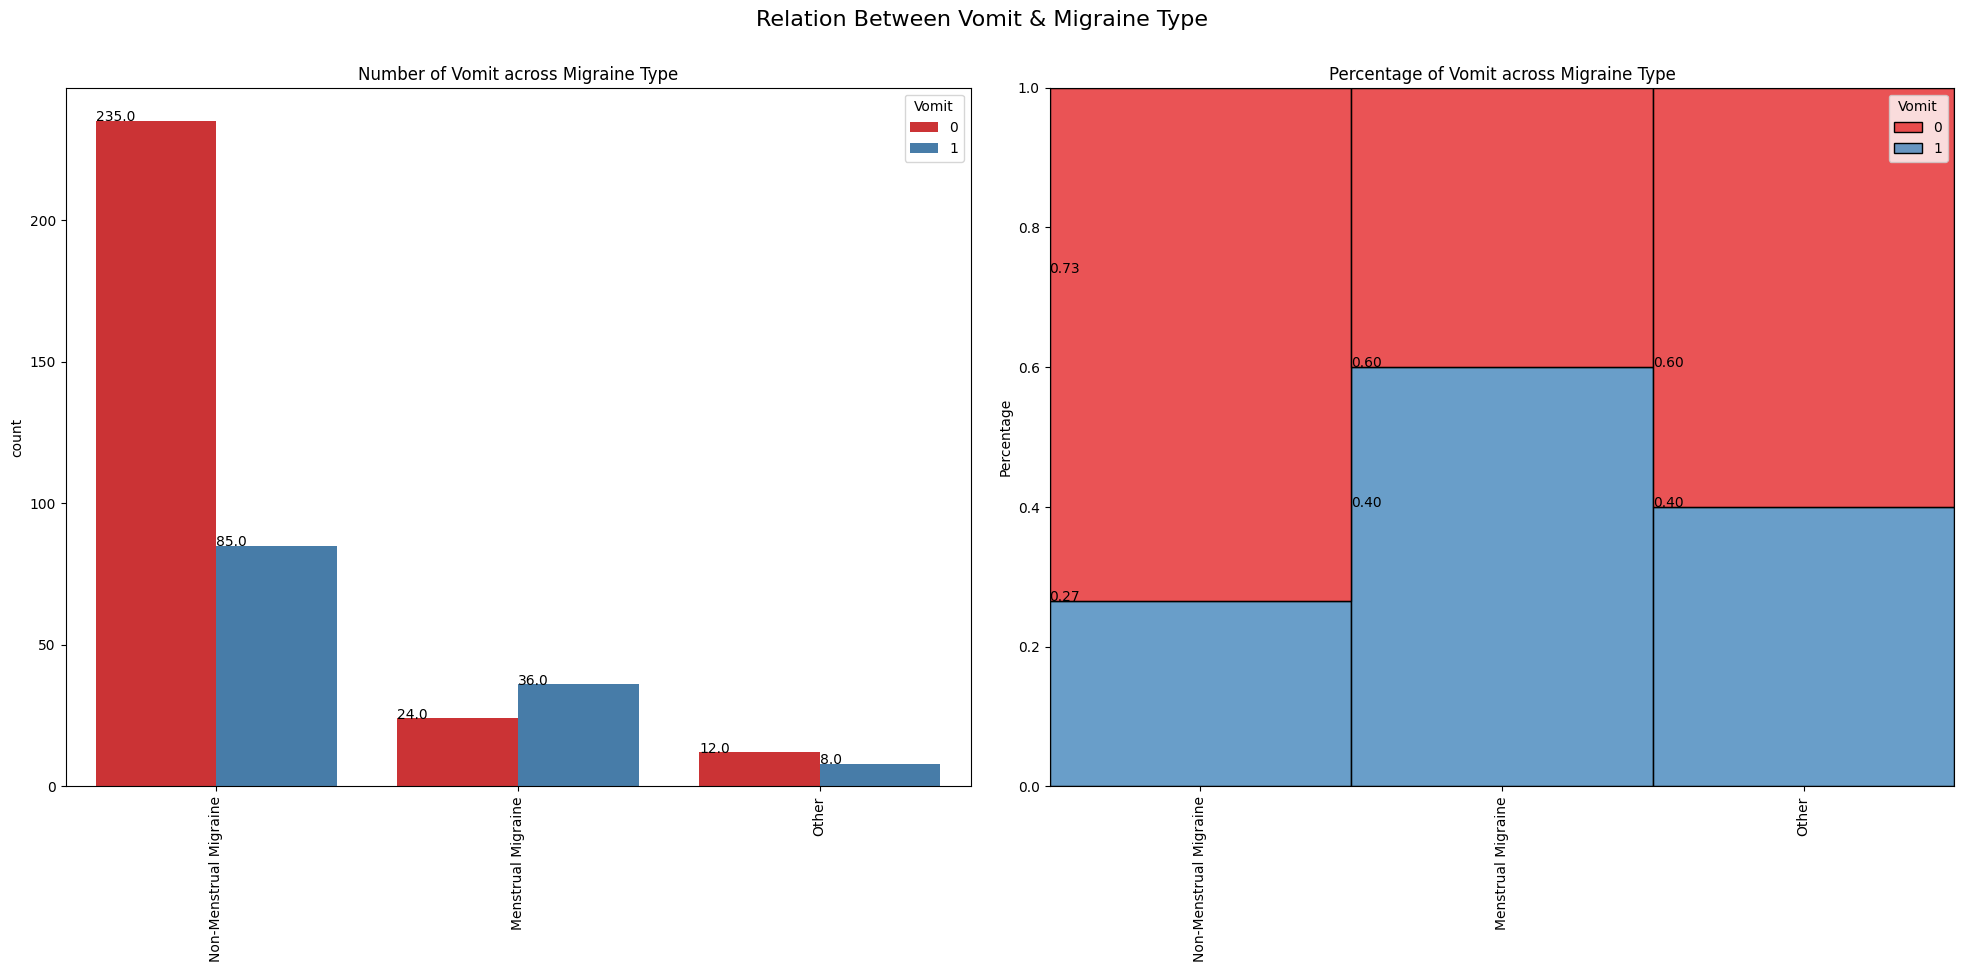

In [12]:
count_percentage_plot(df, 'Vomit', 'Type', "Relation Between Vomit & Migraine Type")

## __Phonophobia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


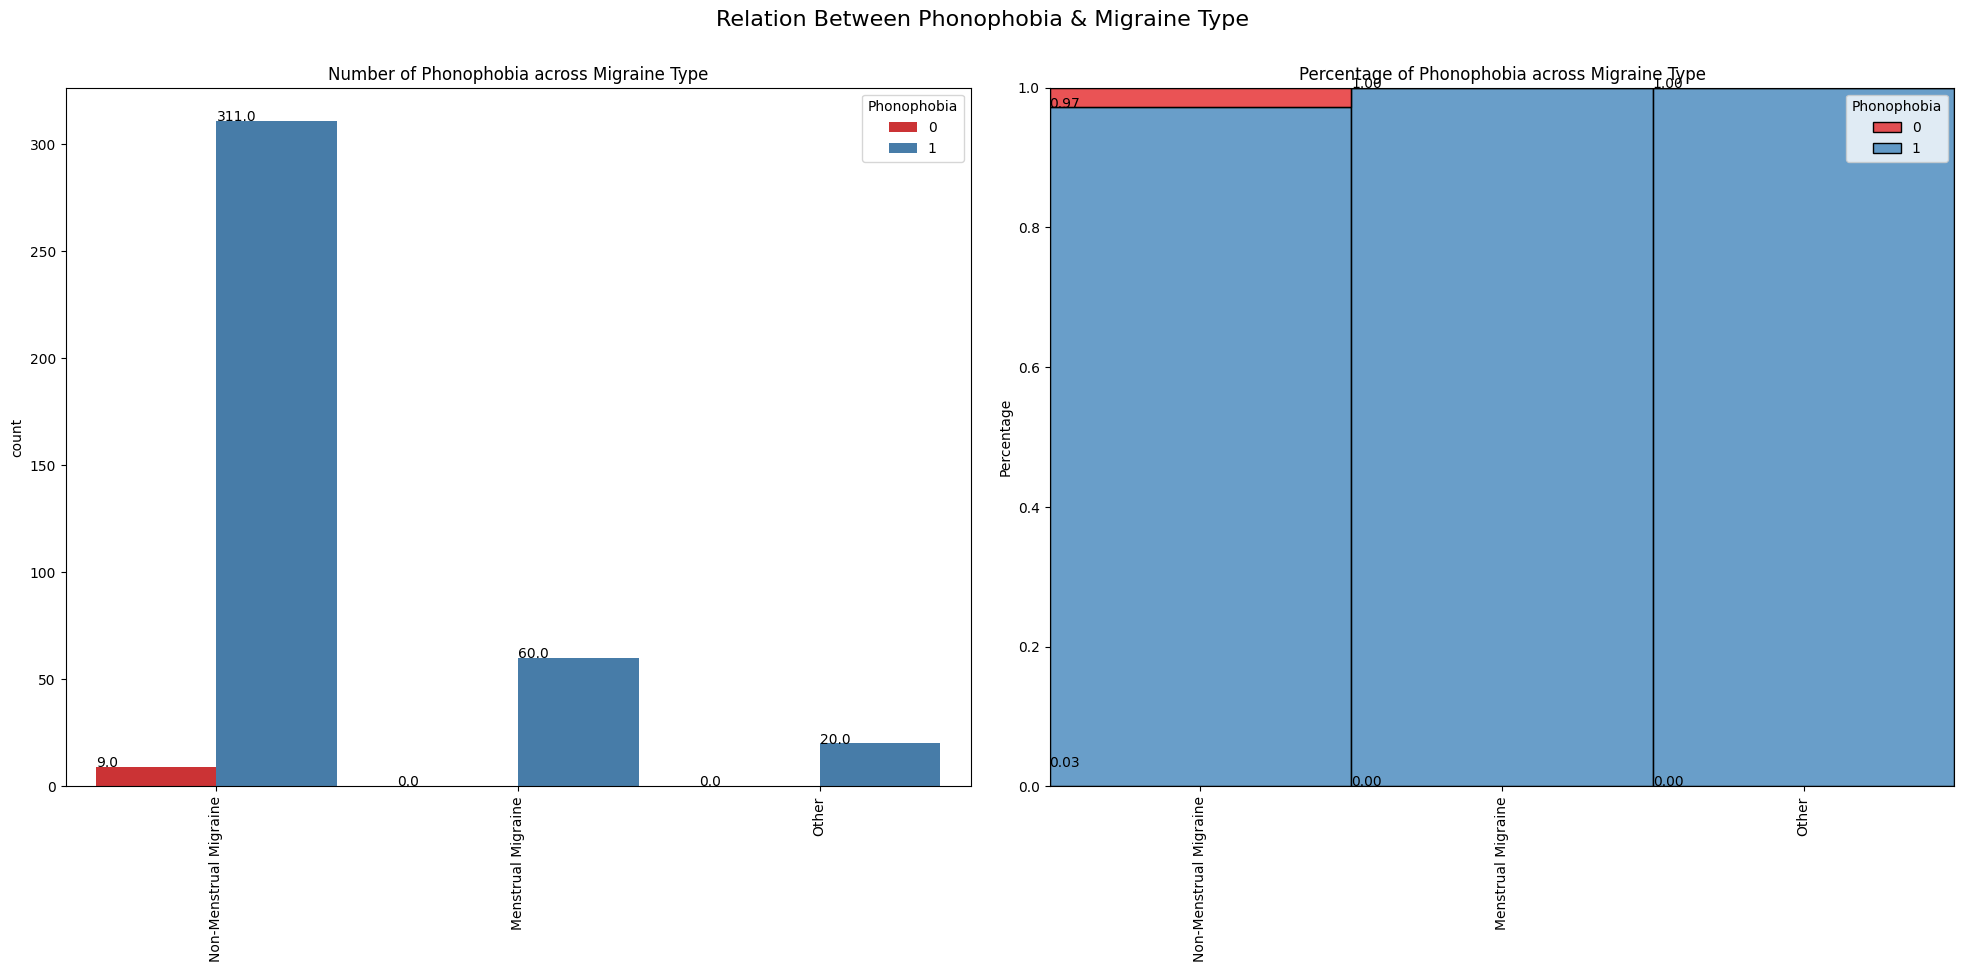

In [13]:
count_percentage_plot(df, 'Phonophobia', 'Type', "Relation Between Phonophobia & Migraine Type")

## __Photophobia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


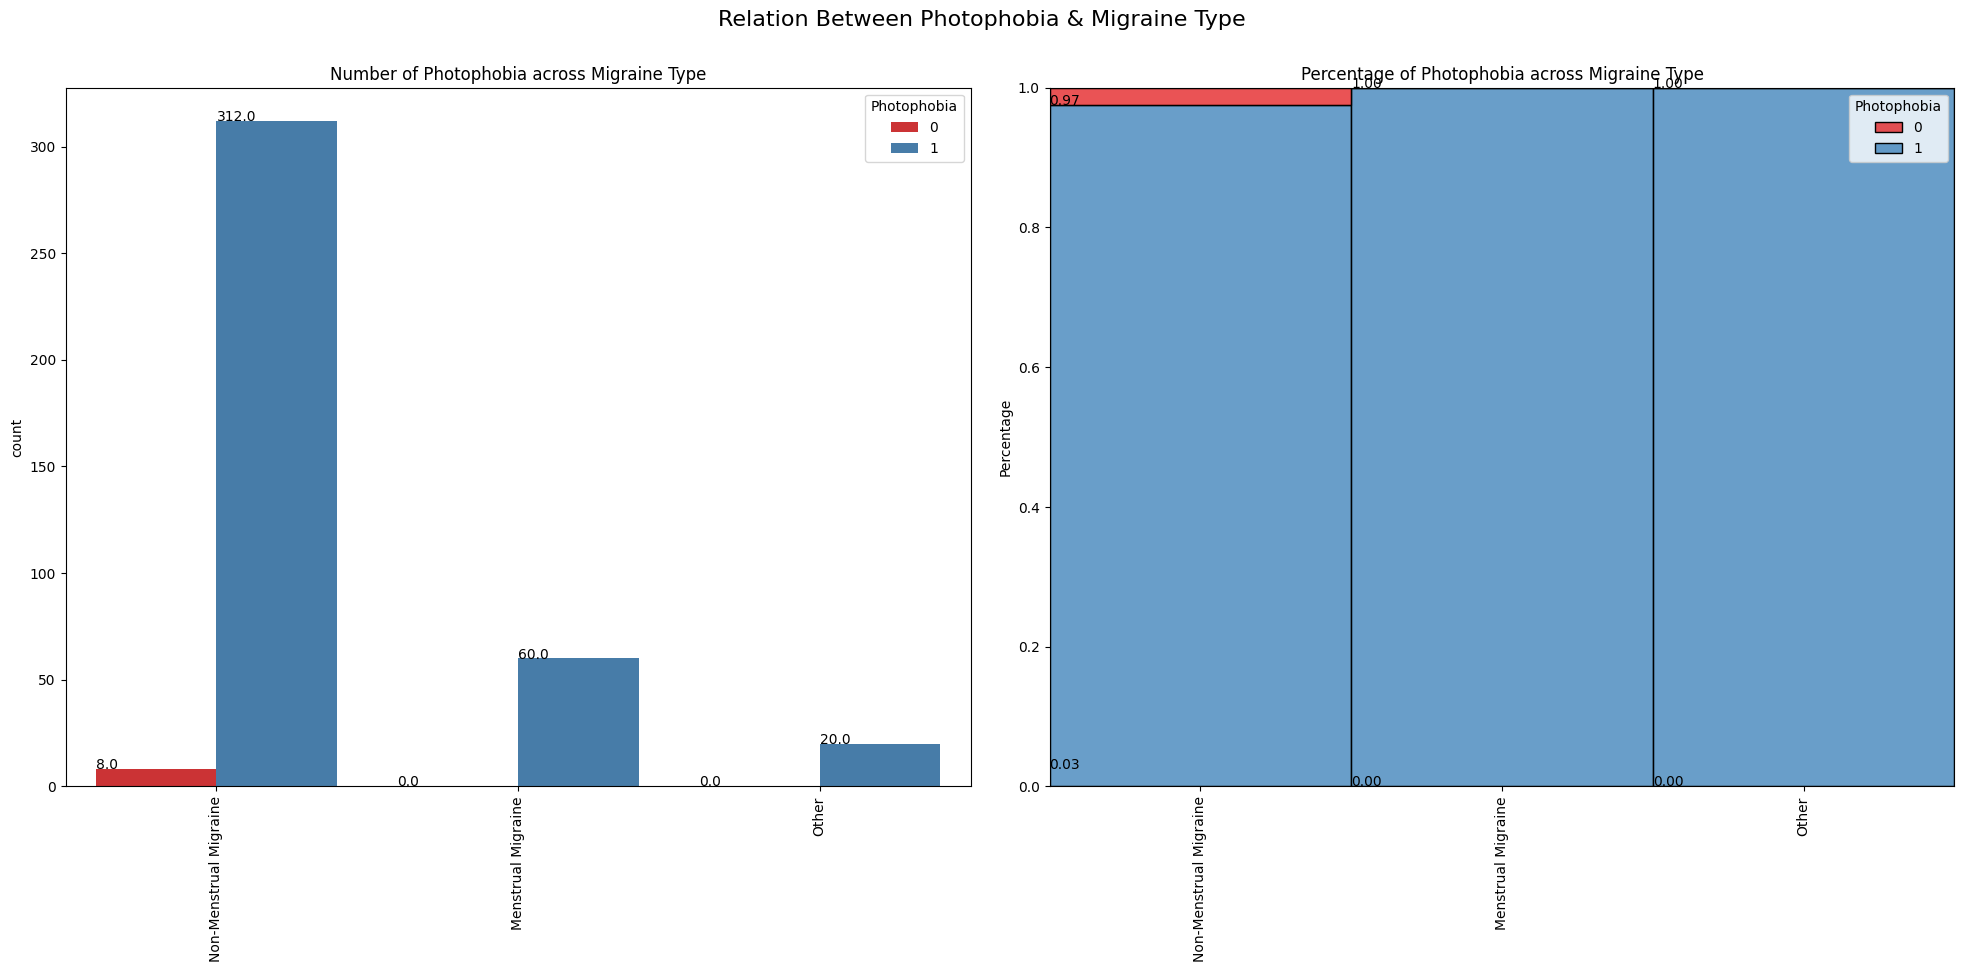

In [14]:
count_percentage_plot(df, 'Photophobia', 'Type', "Relation Between Photophobia & Migraine Type")

## __Visual and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


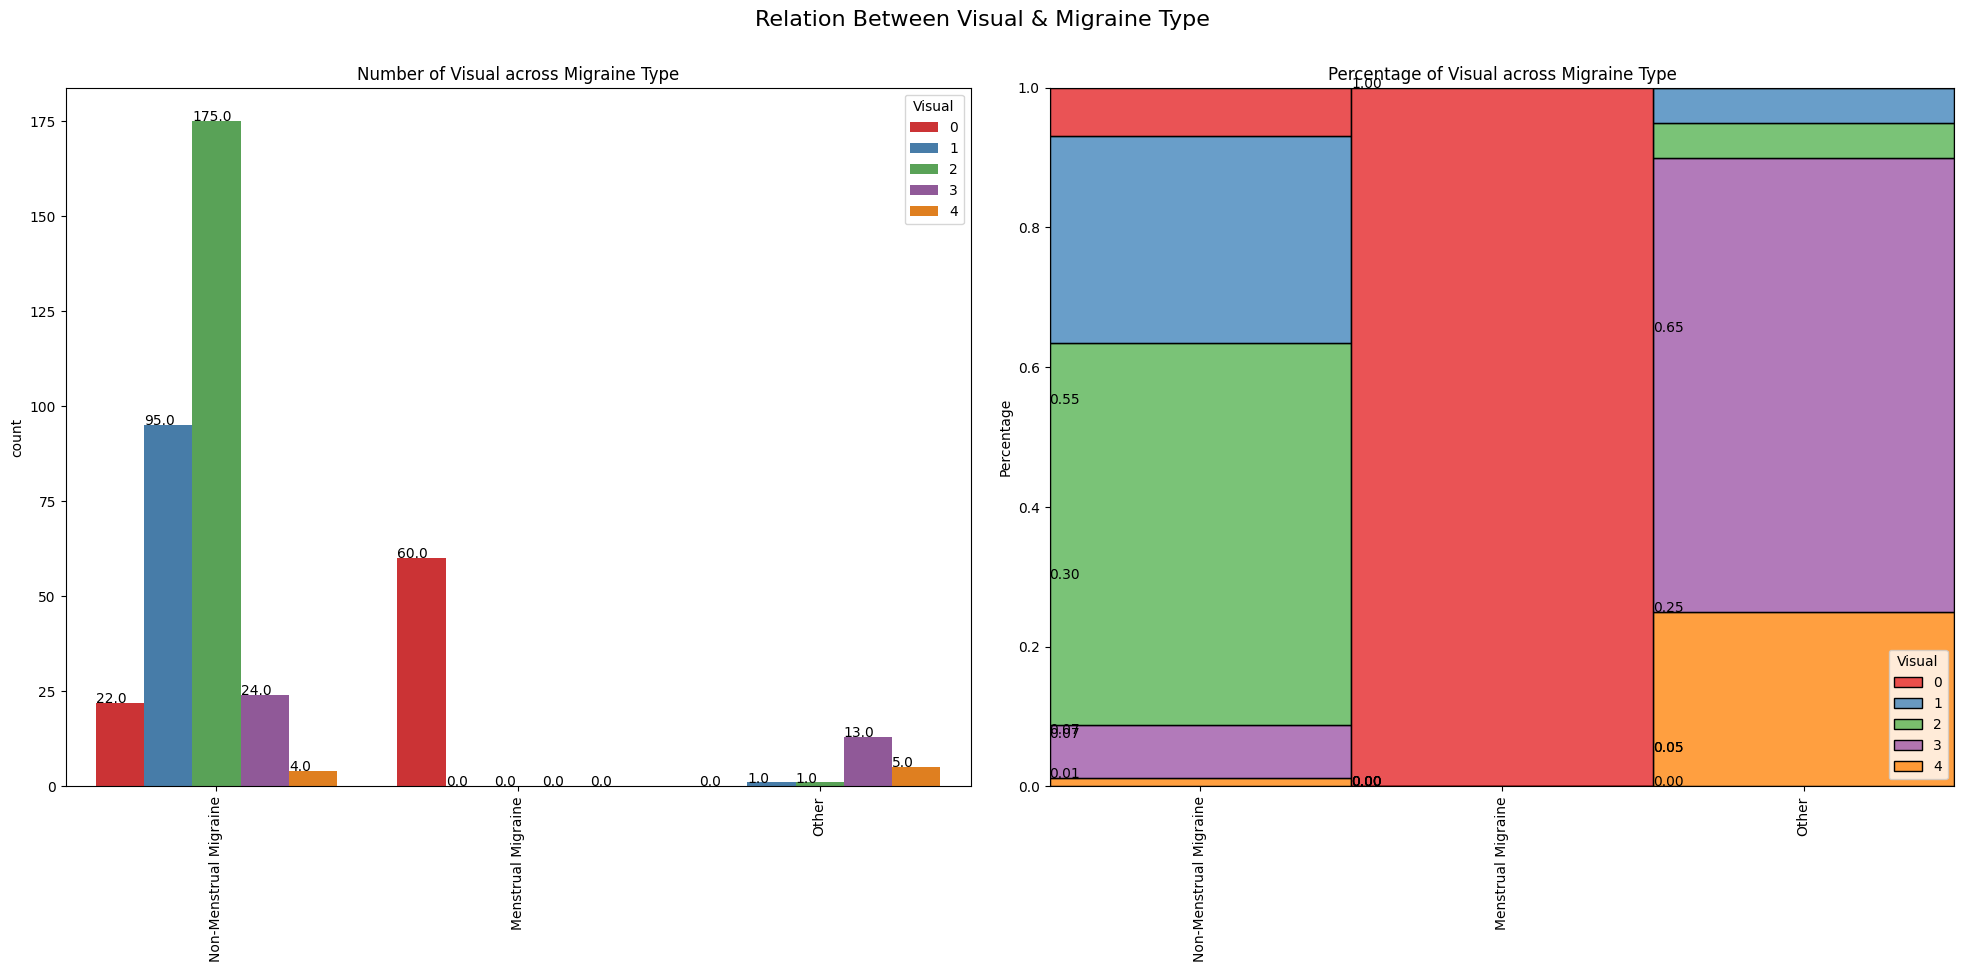

In [15]:
count_percentage_plot(df, 'Visual', 'Type', "Relation Between Visual & Migraine Type")

## __Sensory and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


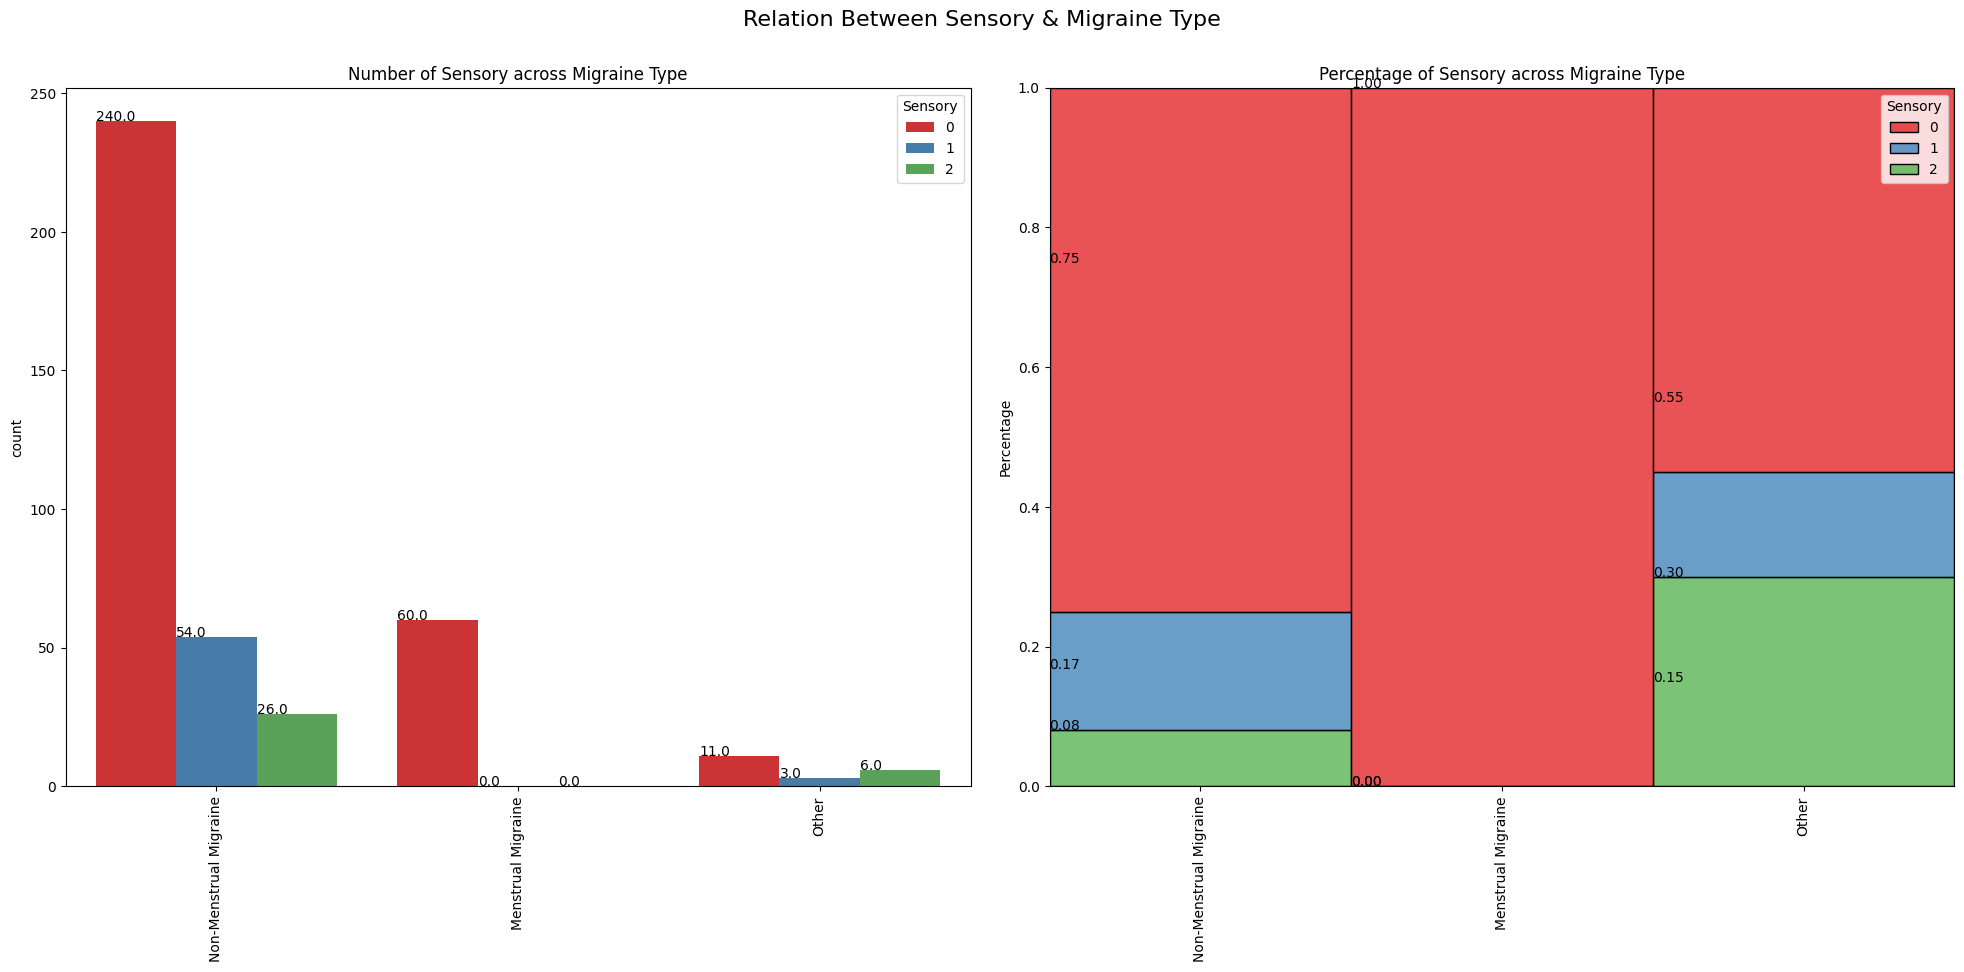

In [16]:
count_percentage_plot(df, 'Sensory', 'Type', "Relation Between Sensory & Migraine Type")

## __Dysphasia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


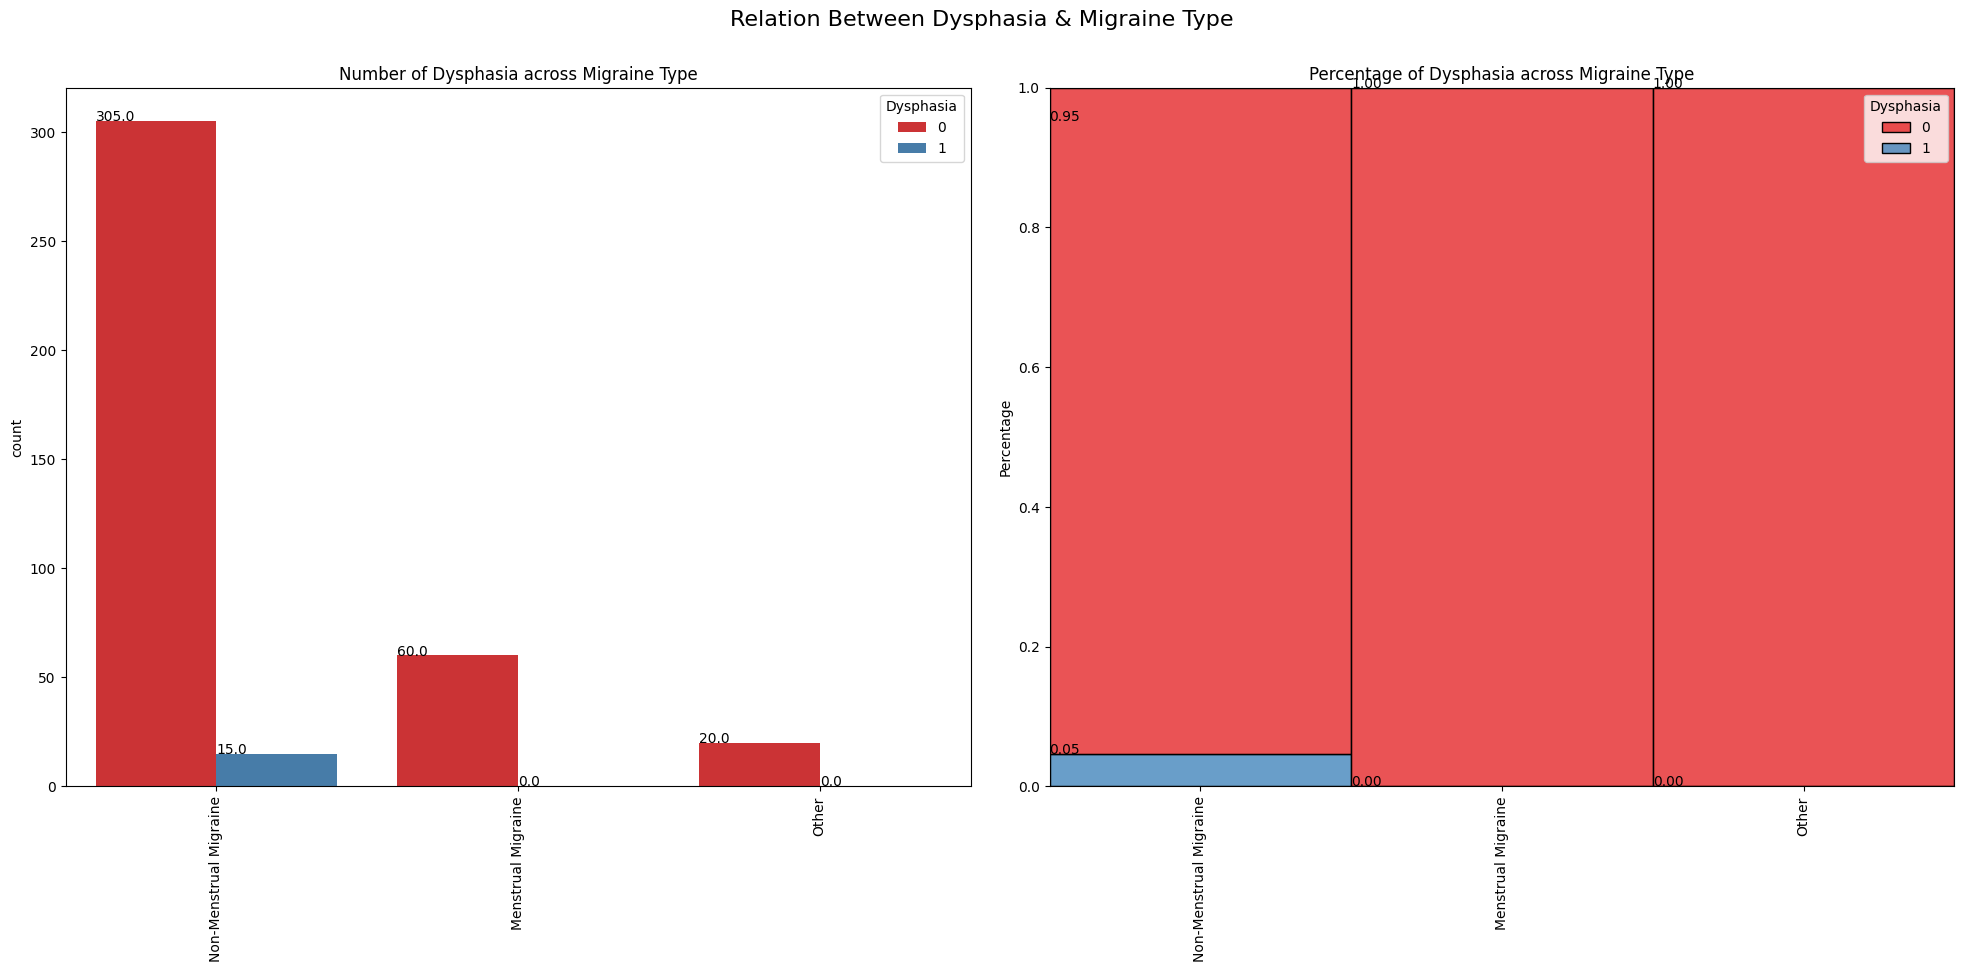

In [17]:
count_percentage_plot(df, 'Dysphasia', 'Type', "Relation Between Dysphasia & Migraine Type")

## __Dysarthria and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


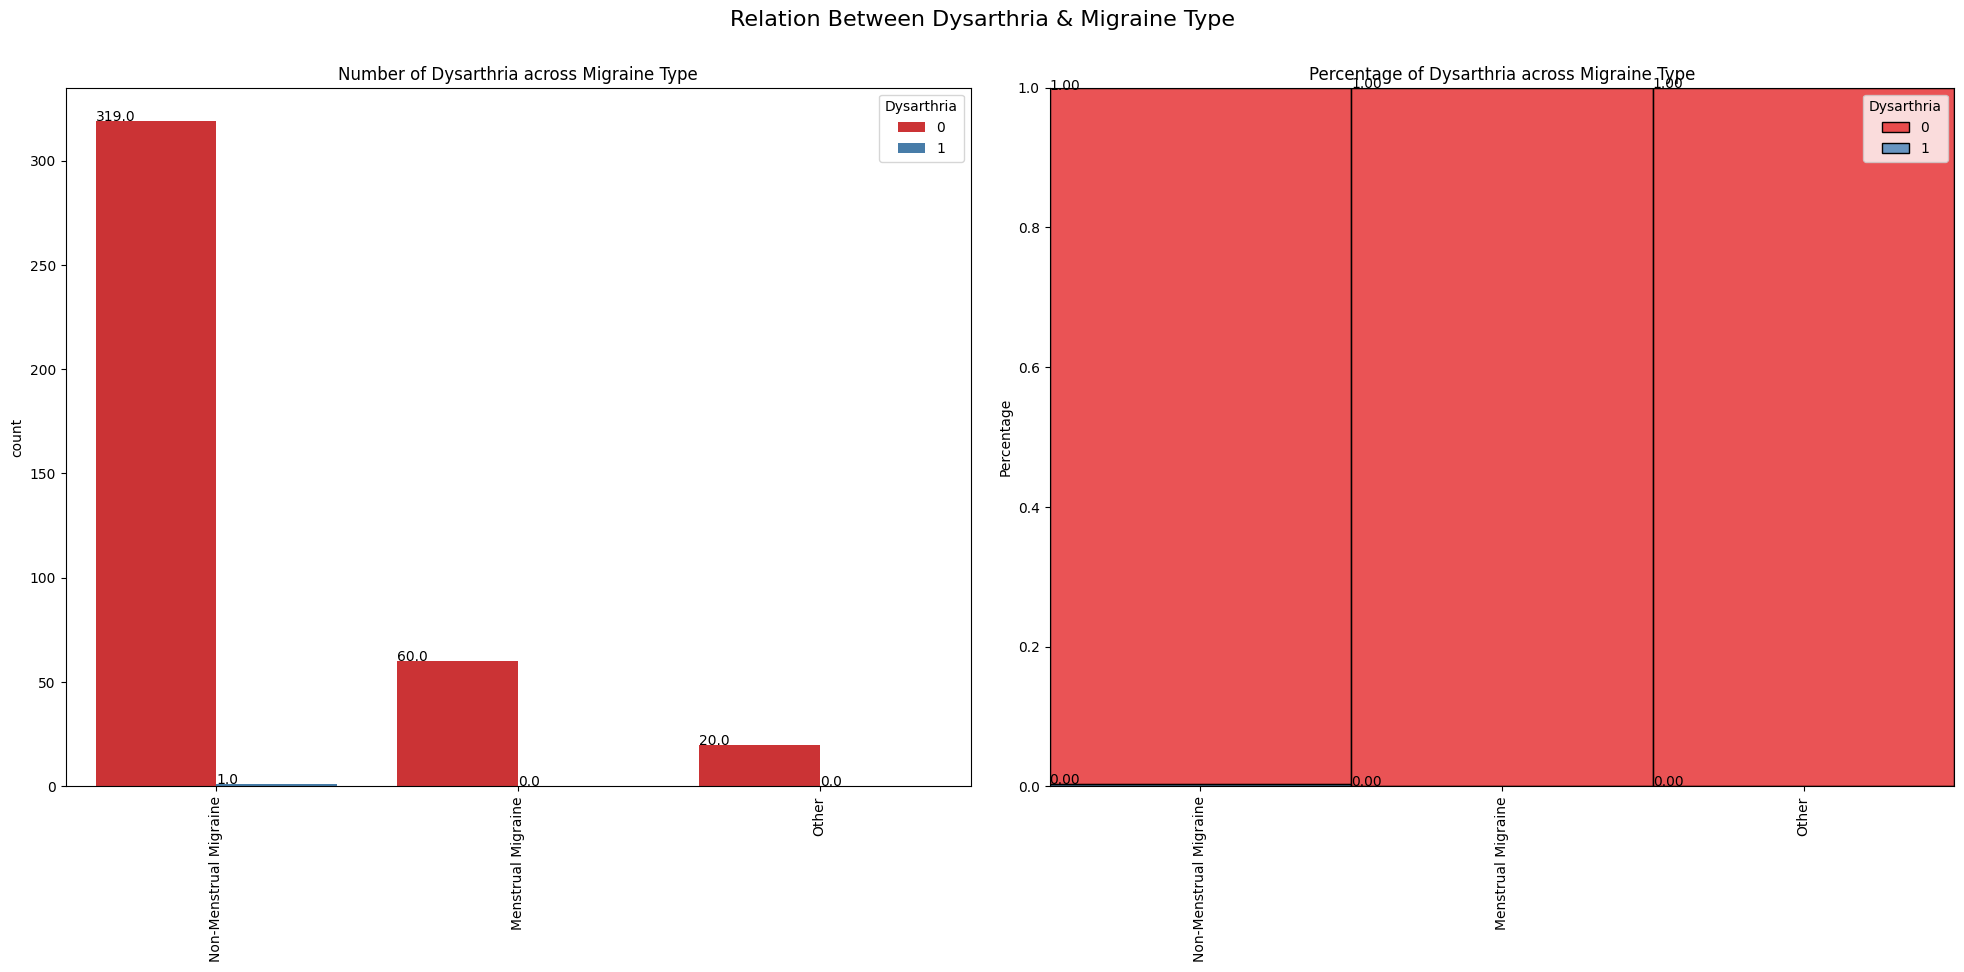

In [18]:
count_percentage_plot(df, 'Dysarthria', 'Type', "Relation Between Dysarthria & Migraine Type")

## __Vertigo and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


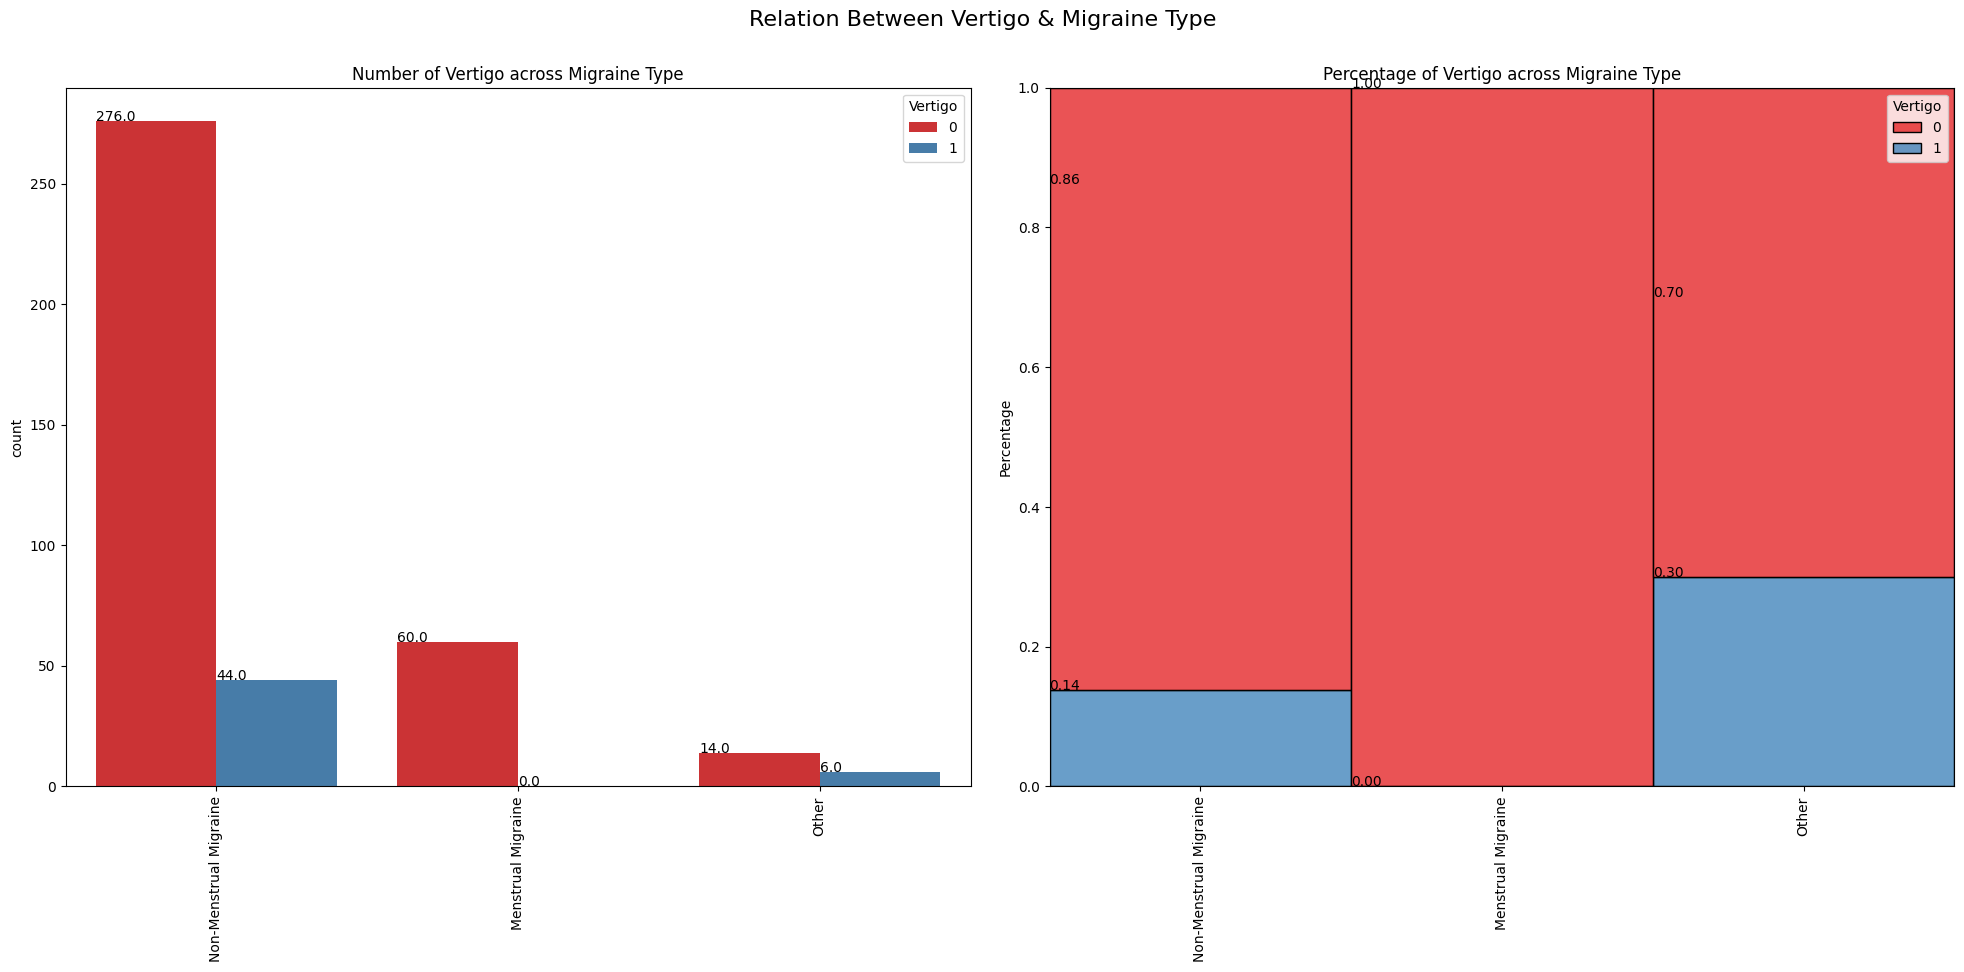

In [19]:
count_percentage_plot(df, 'Vertigo', 'Type', "Relation Between Vertigo & Migraine Type")

## __Tinnitus and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


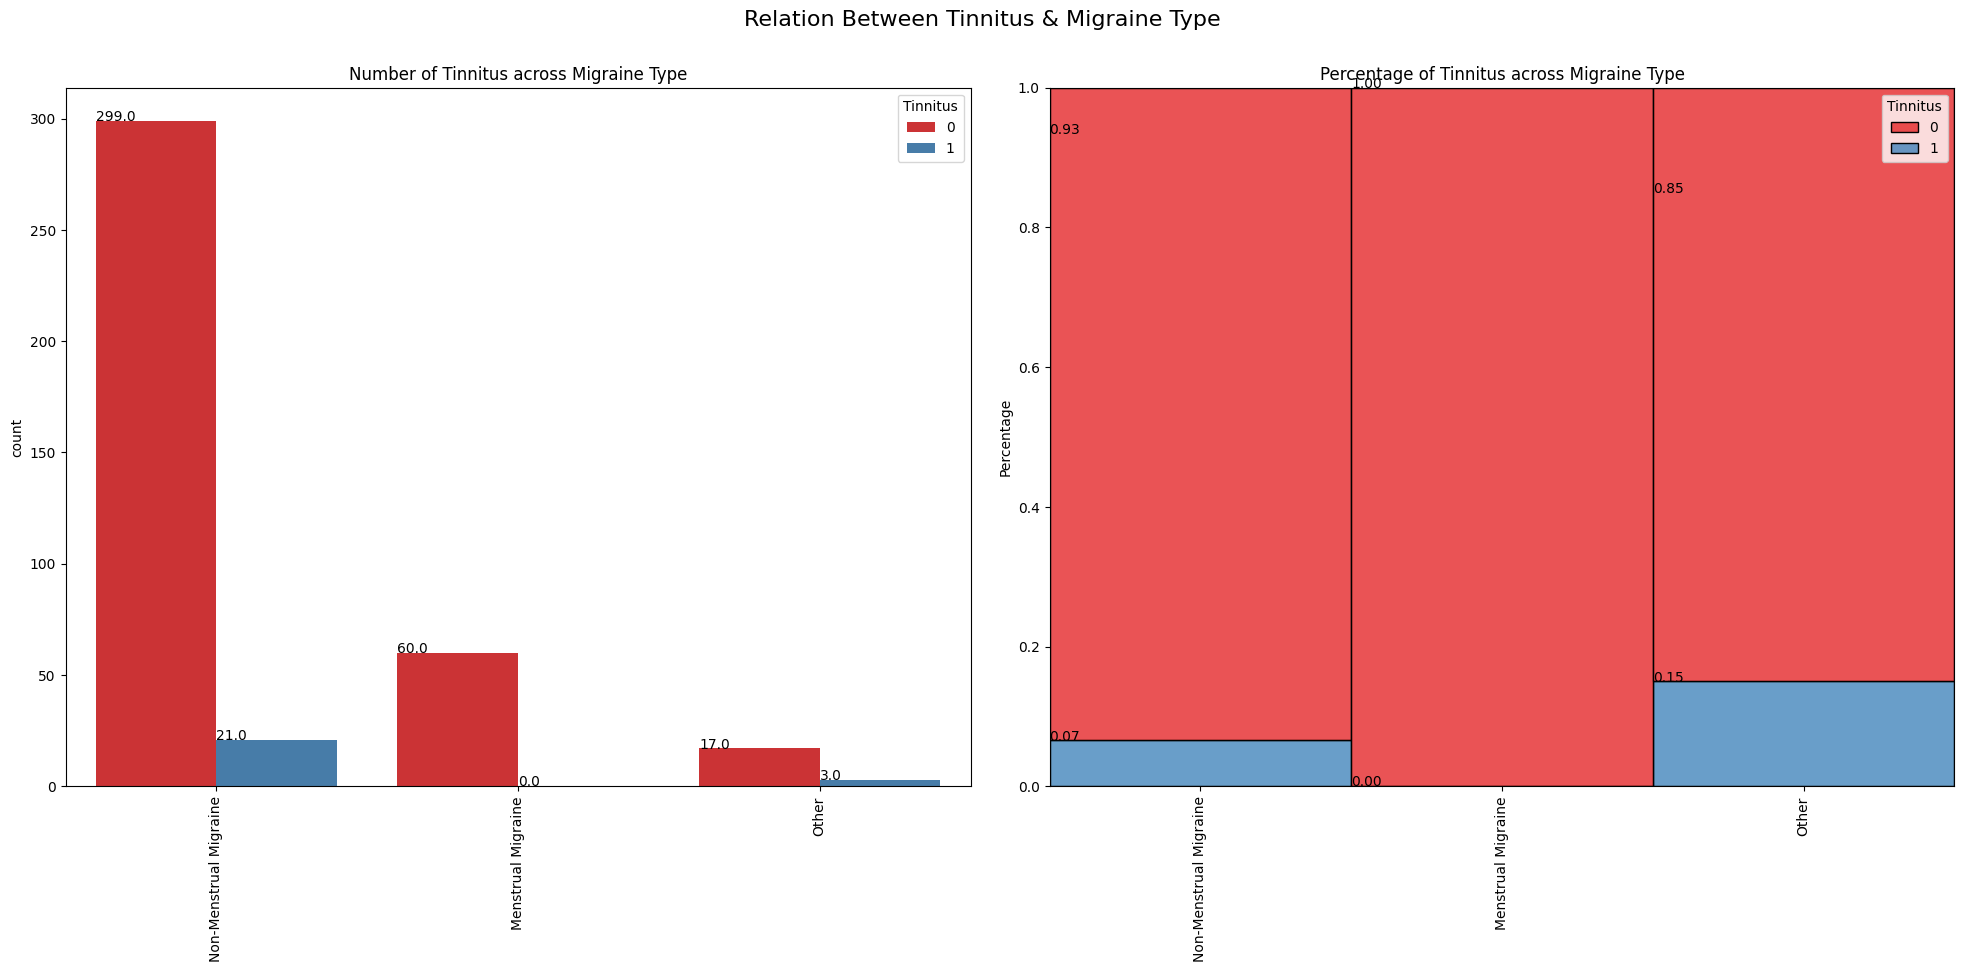

In [20]:
count_percentage_plot(df, 'Tinnitus', 'Type', "Relation Between Tinnitus & Migraine Type")

## __Hypoacusis and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


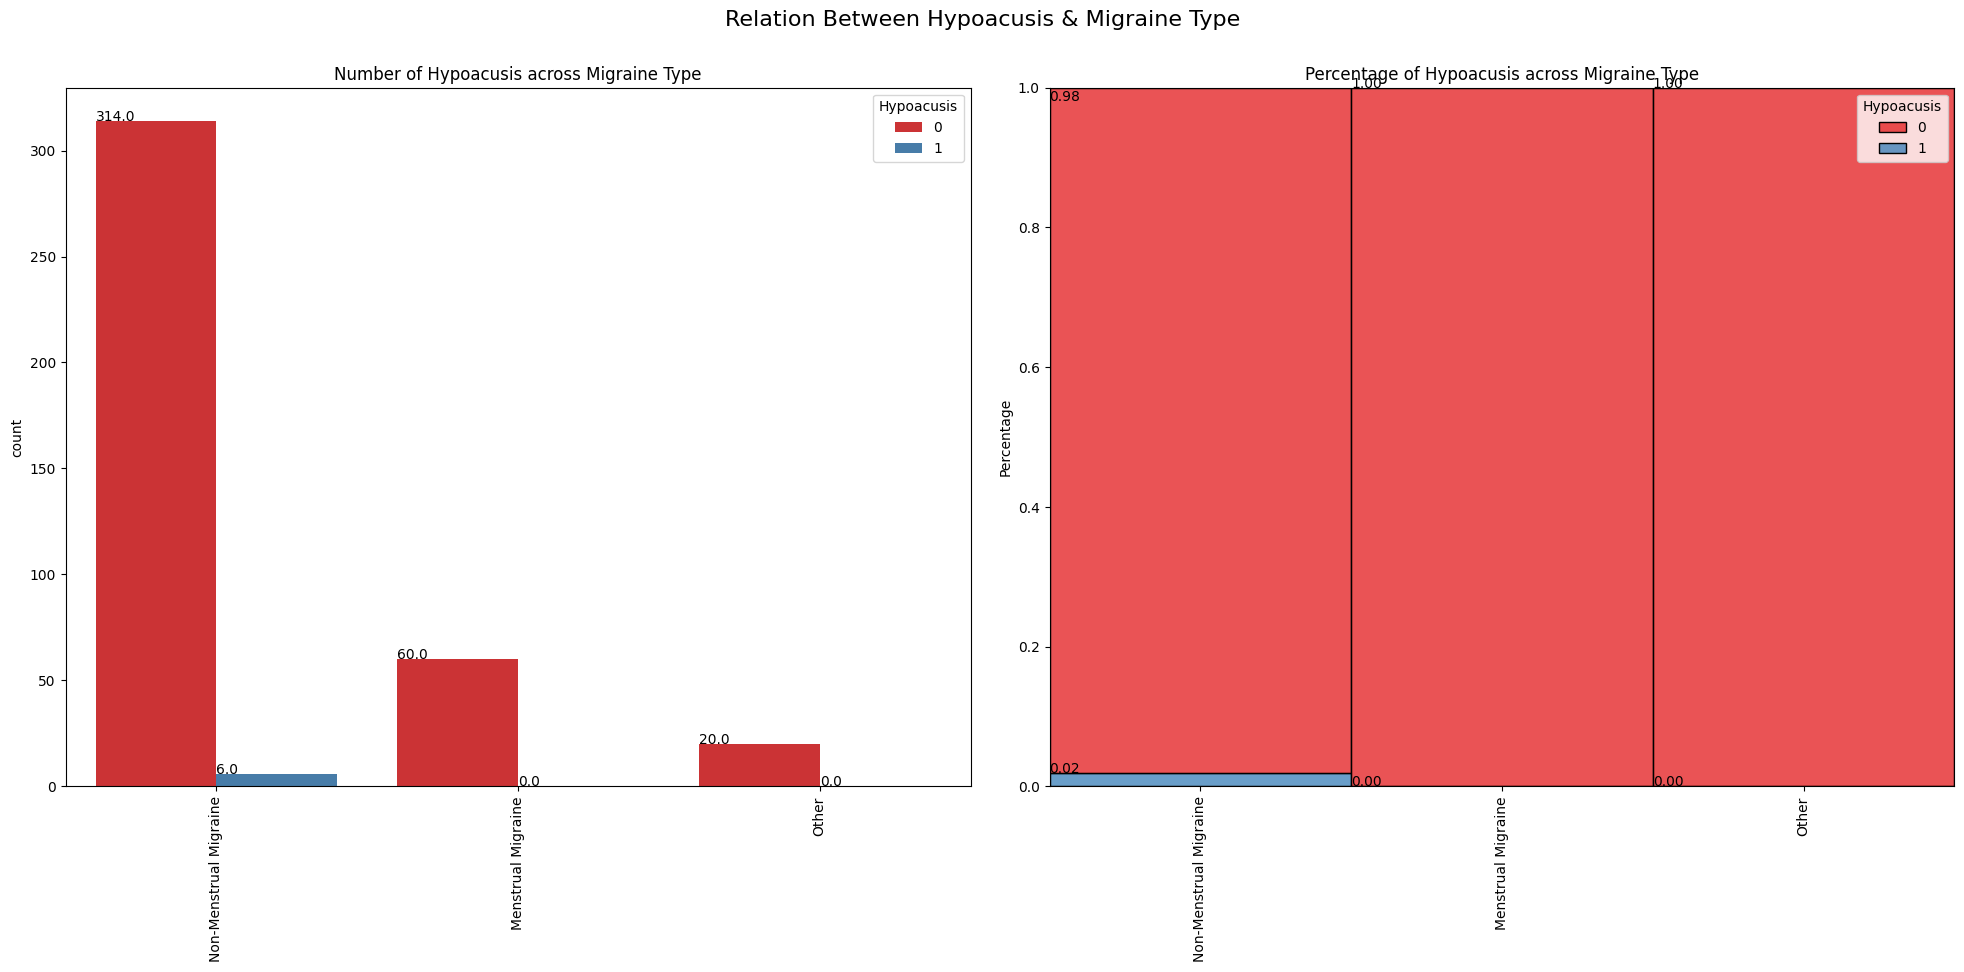

In [21]:
count_percentage_plot(df, 'Hypoacusis', 'Type', "Relation Between Hypoacusis & Migraine Type")

## __Diplopia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


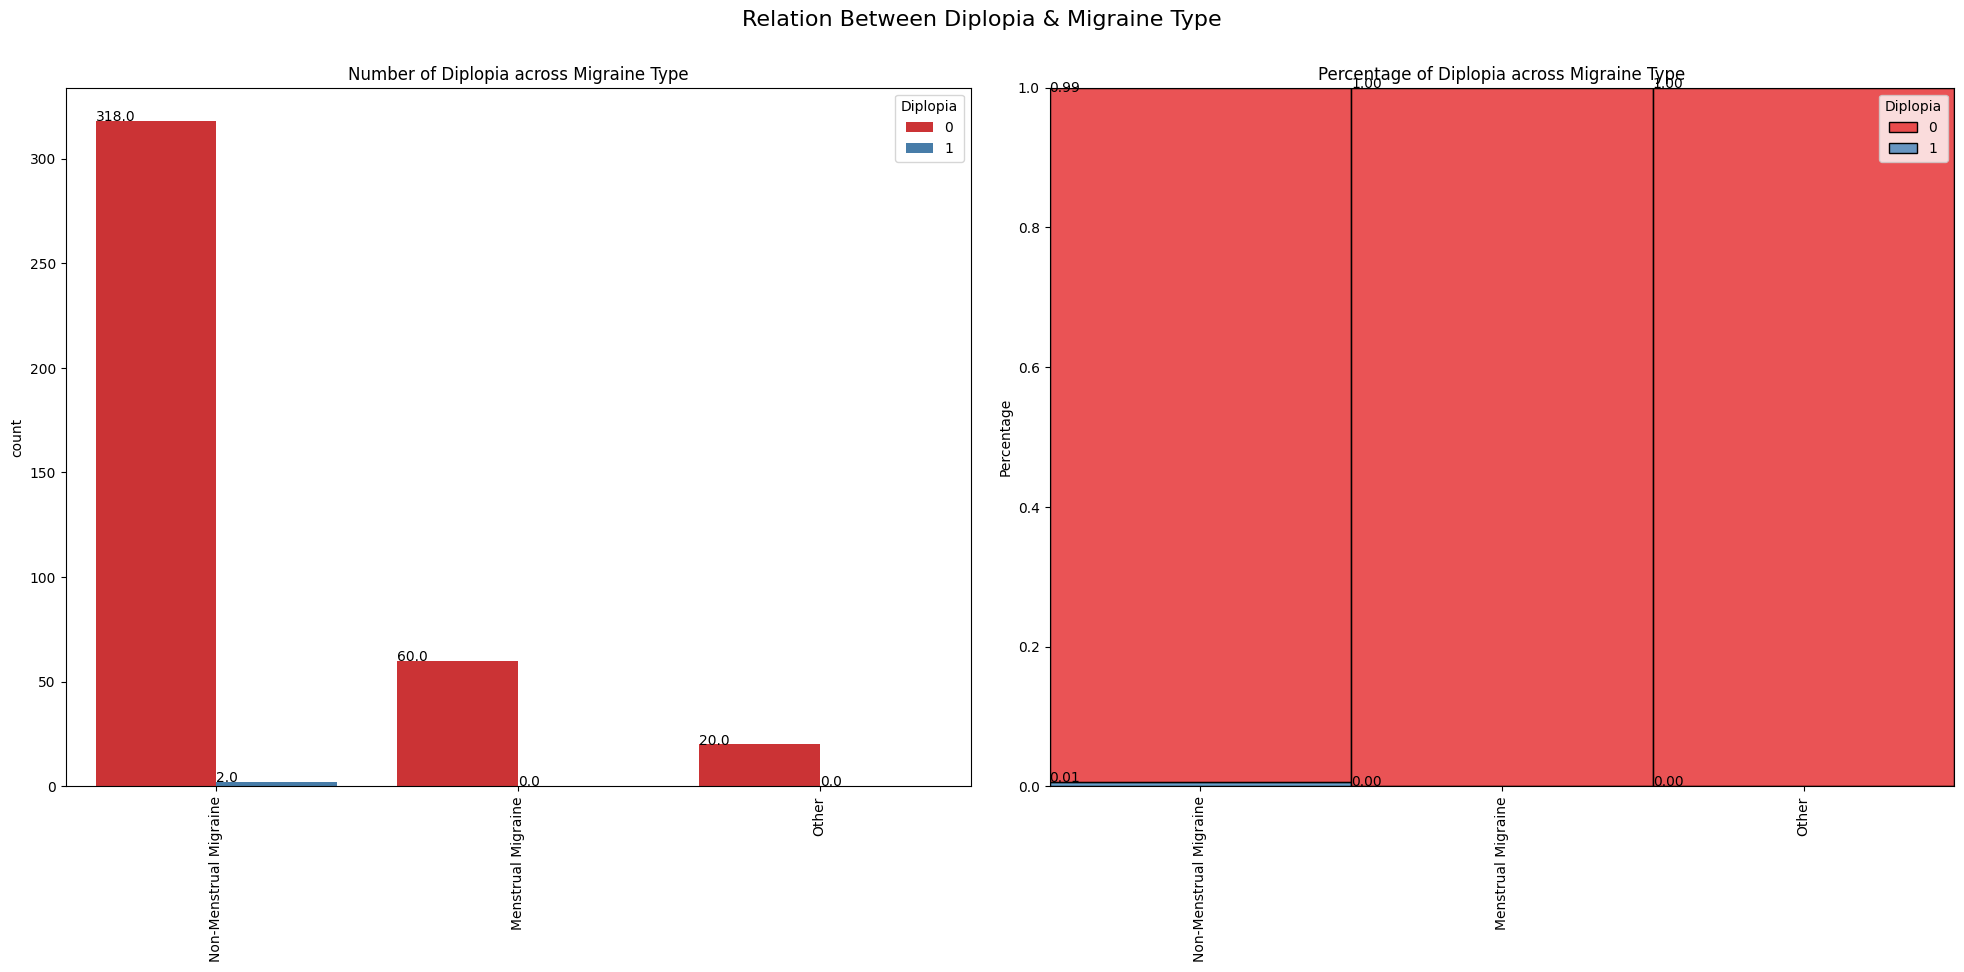

In [22]:
count_percentage_plot(df, 'Diplopia', 'Type', "Relation Between Diplopia & Migraine Type")

## __Ataxia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


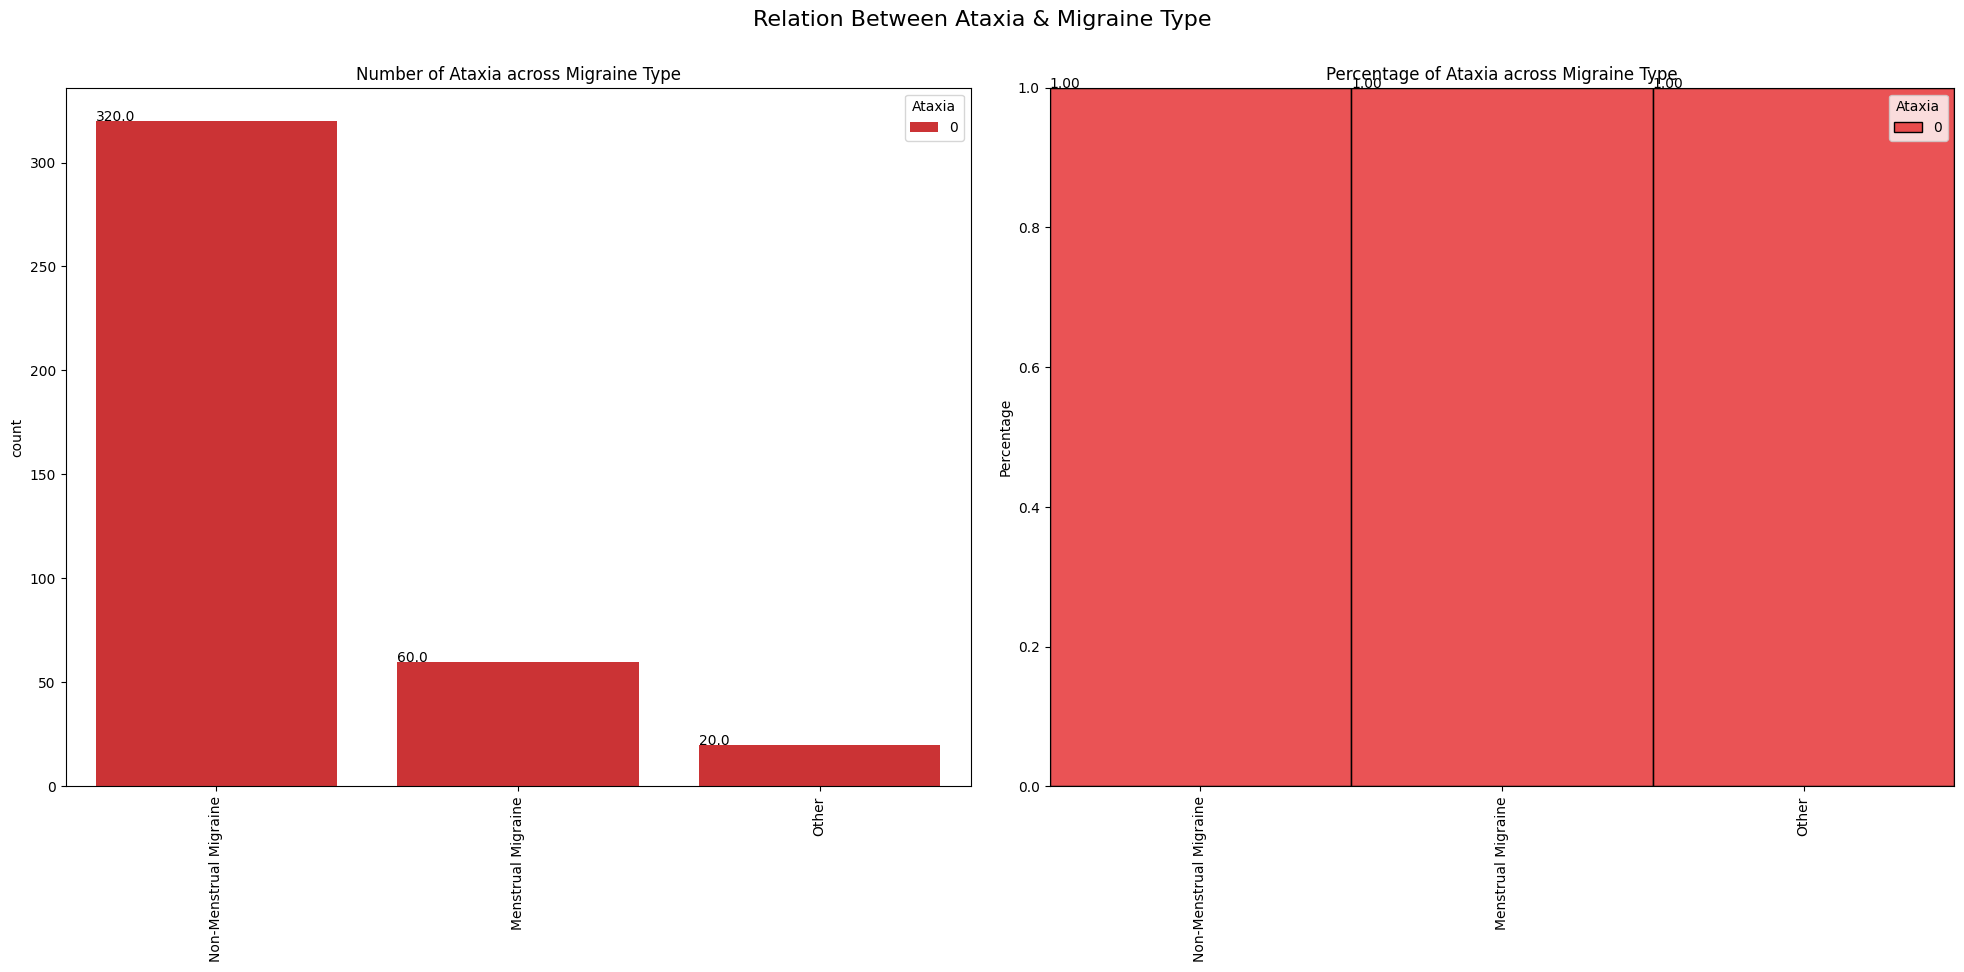

In [23]:
count_percentage_plot(df, 'Ataxia', 'Type', "Relation Between Ataxia & Migraine Type")

## __Conscience and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


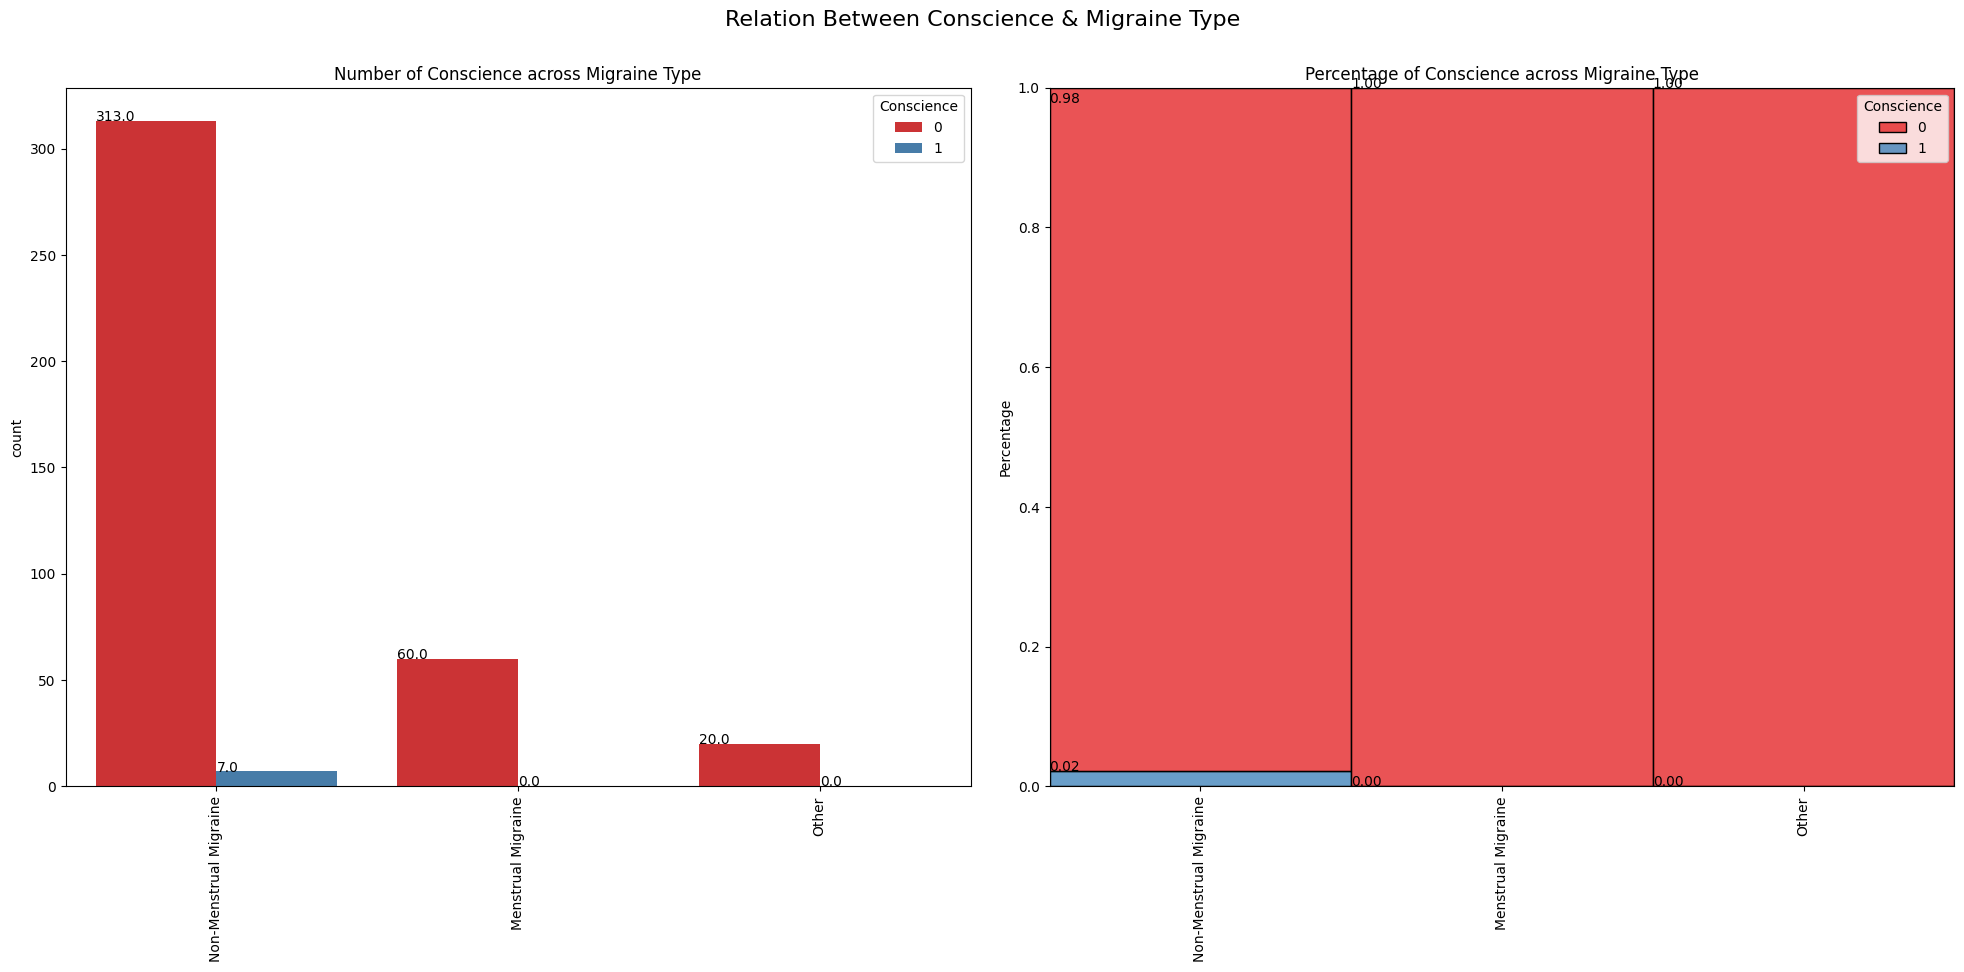

In [24]:
count_percentage_plot(df, 'Conscience', 'Type', "Relation Between Conscience & Migraine Type")

## __Paresthesia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


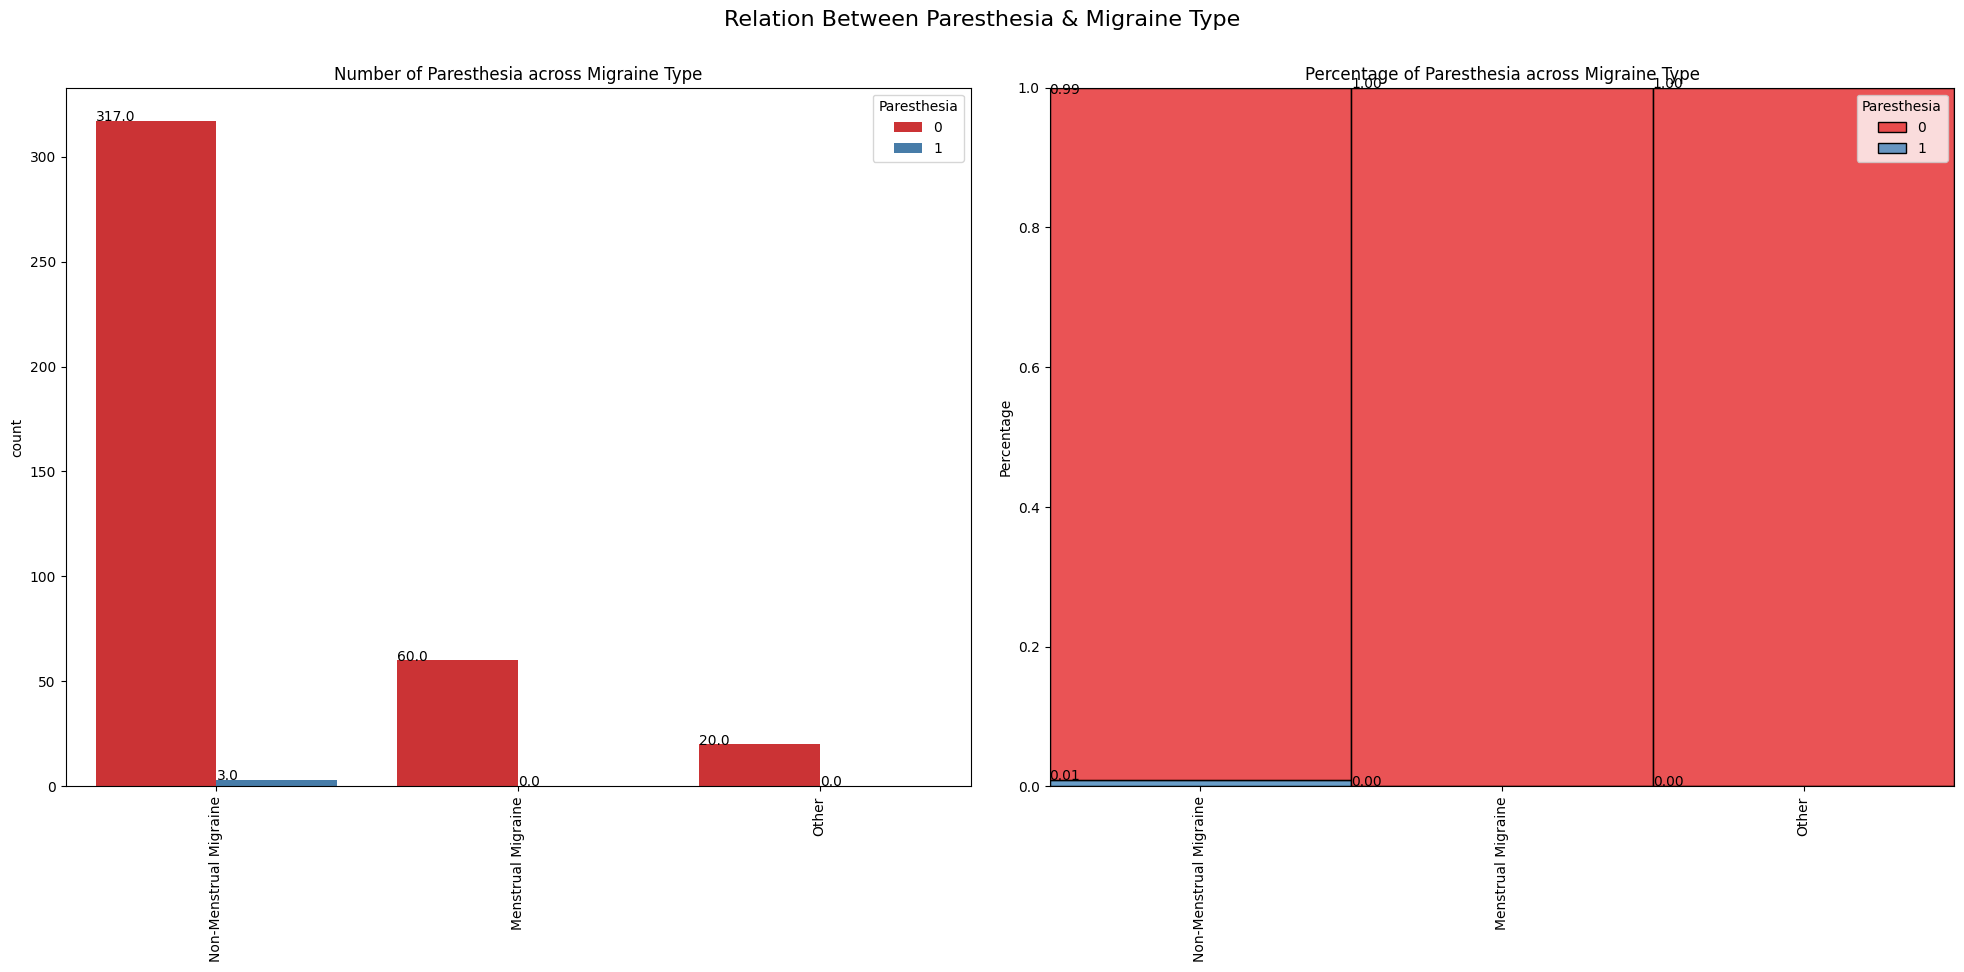

In [25]:
count_percentage_plot(df, 'Paresthesia', 'Type', "Relation Between Paresthesia & Migraine Type")

## __DPF and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


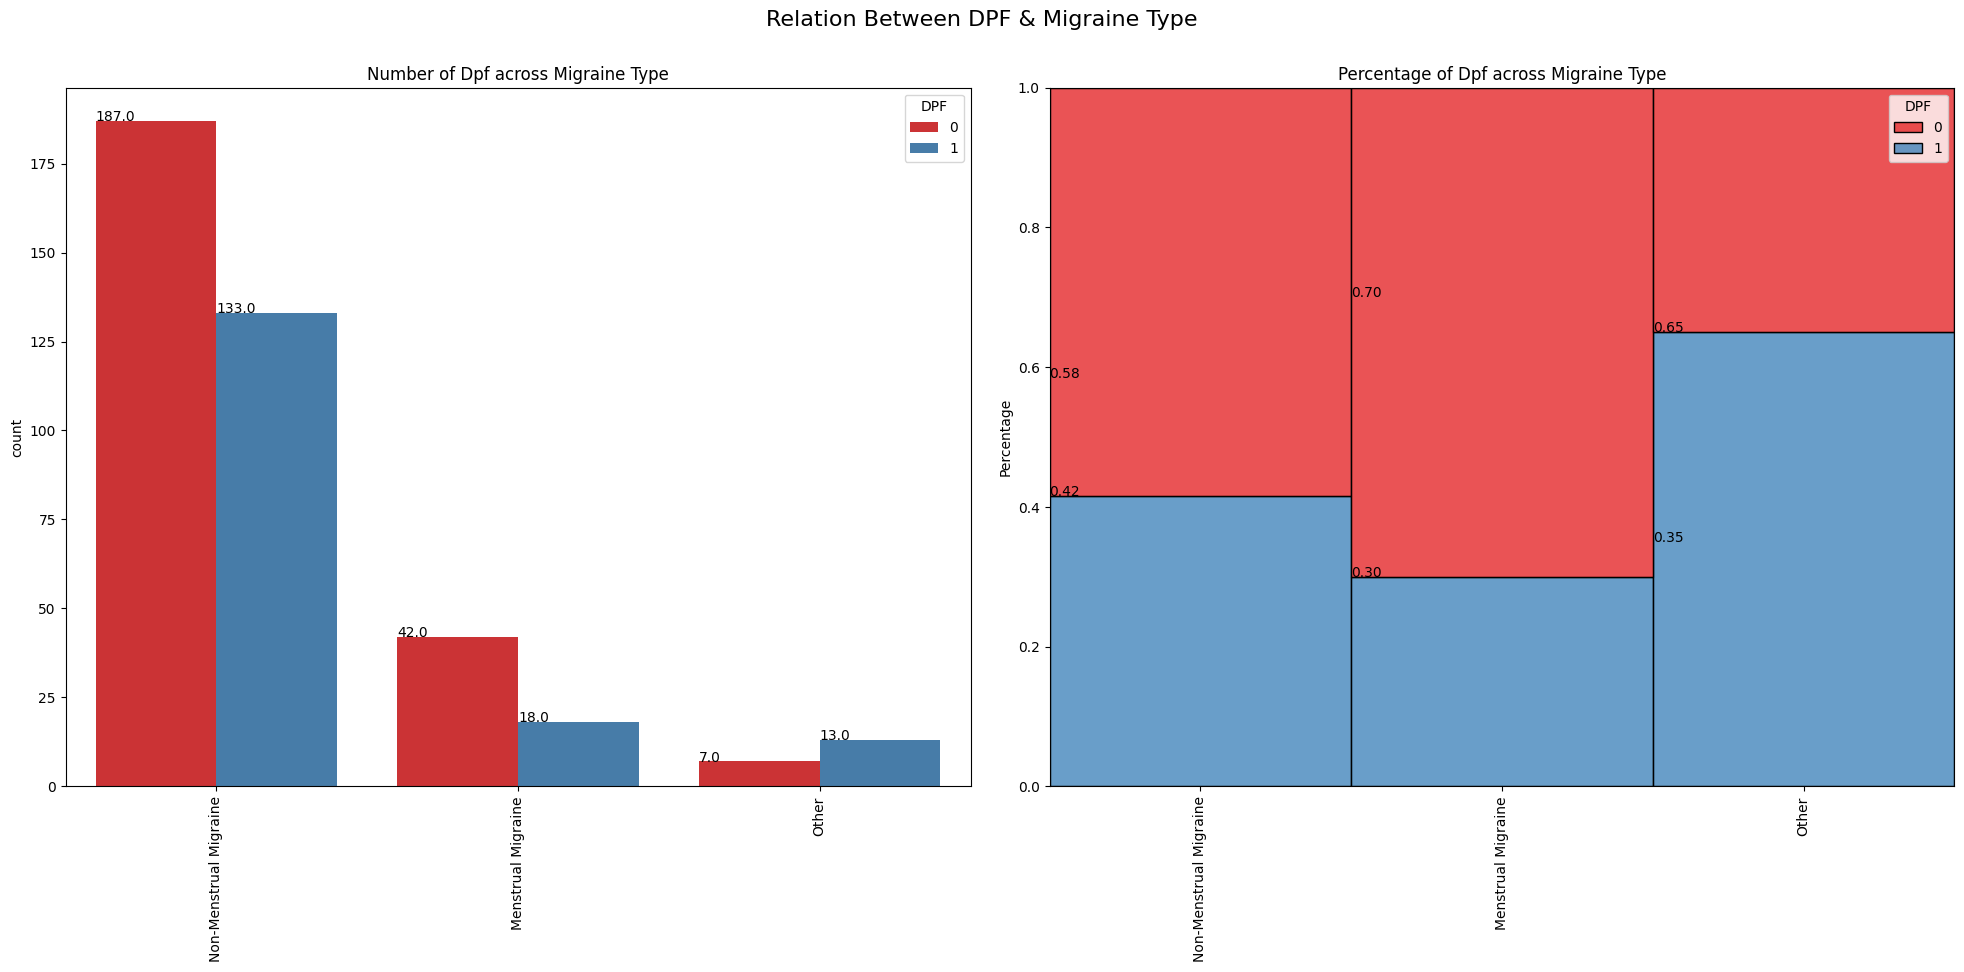

In [26]:
count_percentage_plot(df, 'DPF', 'Type', "Relation Between DPF & Migraine Type")

## ___Relation Between Continous Variable and Target___

## __Distribution of Age__

In [27]:
from matplotlib.pyplot import colorbar


def dist_summary(df,col,title,color="purple"):
    fig,ax = plt.subplots(3,1, figsize=(15,8),sharex=True)
    # Histogram plot
    sns.histplot(df[col], kde=True, ax=ax[0], color=color)
    ax[0].set(xlabel=None)
    ax[0].set_title("KDE Plot")
    
    # Box Plot
    sns.boxplot(df[col], ax=ax[1], color=color)
    ax[1].set(xlabel=None)
    ax[1].set_title("Box Plot")
    
    # Violon Plot
    sns.violinplot(df[col],ax=ax[2], color=color)
    ax[2].set(xlabel=None)
    ax[2].set_title("Violin Plot")
    
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(pad=3)
    plt.show()

In [28]:
def hist(df,col):
    plt.figure(figsize=(15,10))
    plt.title("Distribution Of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    sns.histplot(df[col], color='purple')
    plt.show()

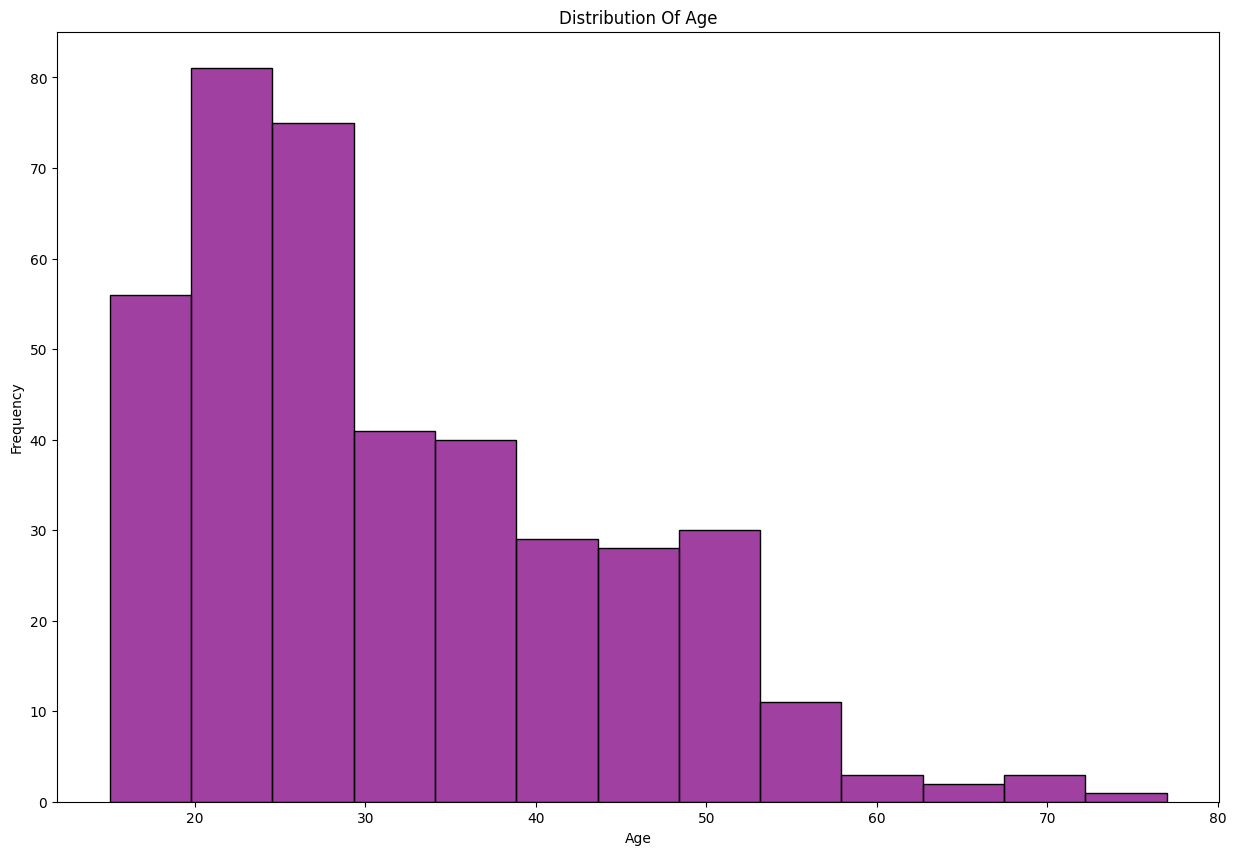

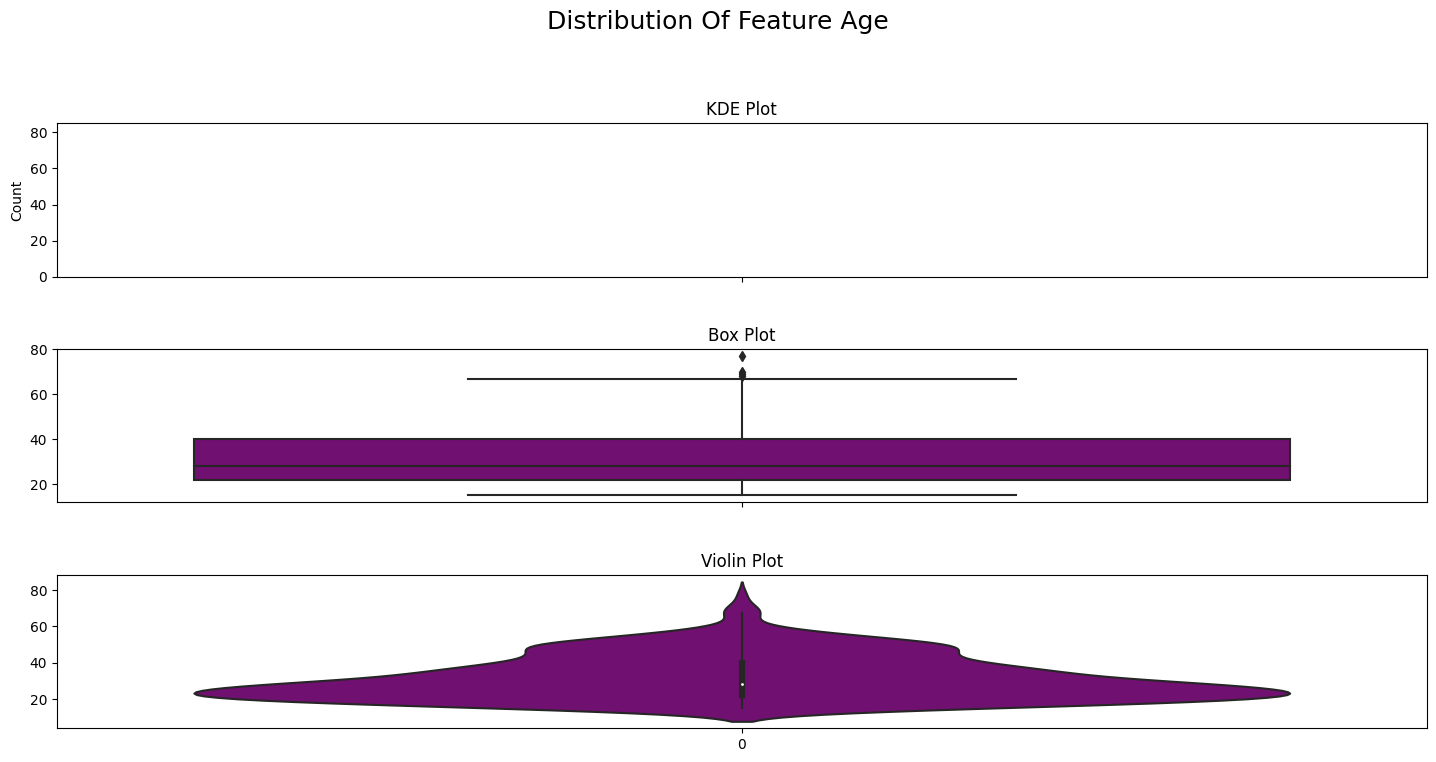

In [29]:
hist(df,"Age")
dist_summary(df,"Age", "Distribution Of Feature Age")

## __Label Encoding the Target Variable__

In [30]:
# Initilize LabelEncoder object
le = LabelEncoder()

# Fit transfrom the Type feature
df['Type'] = le.fit_transform(df["Type"])

# Print the head of data
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF,On Periods,Type,Types
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0


## __Train-Test Split__

In [31]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [32]:
import pandas as pd
import numpy as np
from sklearn import metrics
%pip install tensorflow
import tensorflow as tf

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

seed = 10
np.random.seed(seed)

Note: you may need to restart the kernel to use updated packages.


In [33]:
import keras


In [34]:
# importing libraries and modules...
from keras.models import Sequential
from keras.layers import Dense

In [35]:

#Defining our Base Model
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(14, input_dim = 24, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [36]:
 #Create Keras Classifier to use predefined base model
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)


C:\Users\bokad\AppData\Local\Temp\ipykernel_43416\1017261305.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)


In [37]:
estimator.fit(x, y, batch_size=32, epochs=50)

In [38]:
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = seed)

In [39]:
# Object to describe the result
results = cross_val_score(estimator, x, y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Result: 99.50% (0.61%)


In [55]:
#Testing with a Random Input
a = np.array([[53,1,3,1,1,2,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0]])
b = pd.Series(['Migraine without aura'])
#a.reshape(1, -1)

In [56]:
y_pred = estimator.predict(a)  #prediction

1/1 [==============================] - 0s 32ms/step


In [57]:
print(y_pred)

[0]


In [58]:
#Testing with a Random Input
c = np.array([[46,1,5,1,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1]])
d = pd.Series(['Migraine without aura'])

In [59]:
y_pred = estimator.predict(c)   
print(y_pred)

1/1 [==============================] - 0s 48ms/step
[1]
